In [13]:
#importing required libraries for EDA
#The main aim is to understand the data in better way

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [14]:
#loading the CSV data as Pandas dataframe
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [15]:
#Show top 5 records
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [16]:
#Show bottom 5 records
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [17]:
# To take a mixture of the sample
df.sample()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [18]:
#Removing unnecessary rows from Dataset after observing the Dataset
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)


In [19]:
#Adding New Feature, named Dataset named Region in a dataset
df.loc[:122,'region']='bejaia'
df.loc[122:,'region']='sidi-Bel Abbes'

In [20]:
#Stripping the names of the columns
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [21]:
#Stripping the Class Features Data
df.Classes=df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [22]:
df['Classes'].dtype

dtype('O')

In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [24]:
#Changing the DataTypes of the columns
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [25]:
## Adding new feature named Date by replacing unneccessary feature like day month year
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [26]:
## showing the updated dataset after modification is done
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi-Bel Abbes,2012-09-29


In [27]:
## getting shape and size
df.shape

(244, 13)

In [28]:
#see the columns of the dataset
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [29]:
##check if missing value is present or not in dataset
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

In [30]:
##Unique values of class features
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [31]:
df['Classes']=df['Classes'].map({'not fire':0, 'fire':1})

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [32]:
df['Classes'].mode() [0]

1.0

In [33]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [34]:
df.isnull().sum()    #Observations Now we have zero null values in dataset

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [35]:
df['Classes'].unique()

array([0., 1.])

In [36]:
#Check null & getting feature datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [37]:
##Checking the usage of the memory by the dataset
df.memory_usage()

Index           132
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

In [38]:
#1. Getting numerical features from dataset
#2. Creating Numerical dataframe
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
print('We have {} numerical features:{}'.format(len(numerical_features),numerical_features))

We have 10 numerical features:['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


In [39]:
#1. Getting numerical features from dataset
#2. Creating Numerical dataframe
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))

We have 3 categorical features:['DC', 'FWI', 'region']


In [40]:
#Feature Information
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


In [41]:
#variance of the dataset
numerics=['int32','float64']
df1=df.select_dtypes(include=numerics)
df1.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

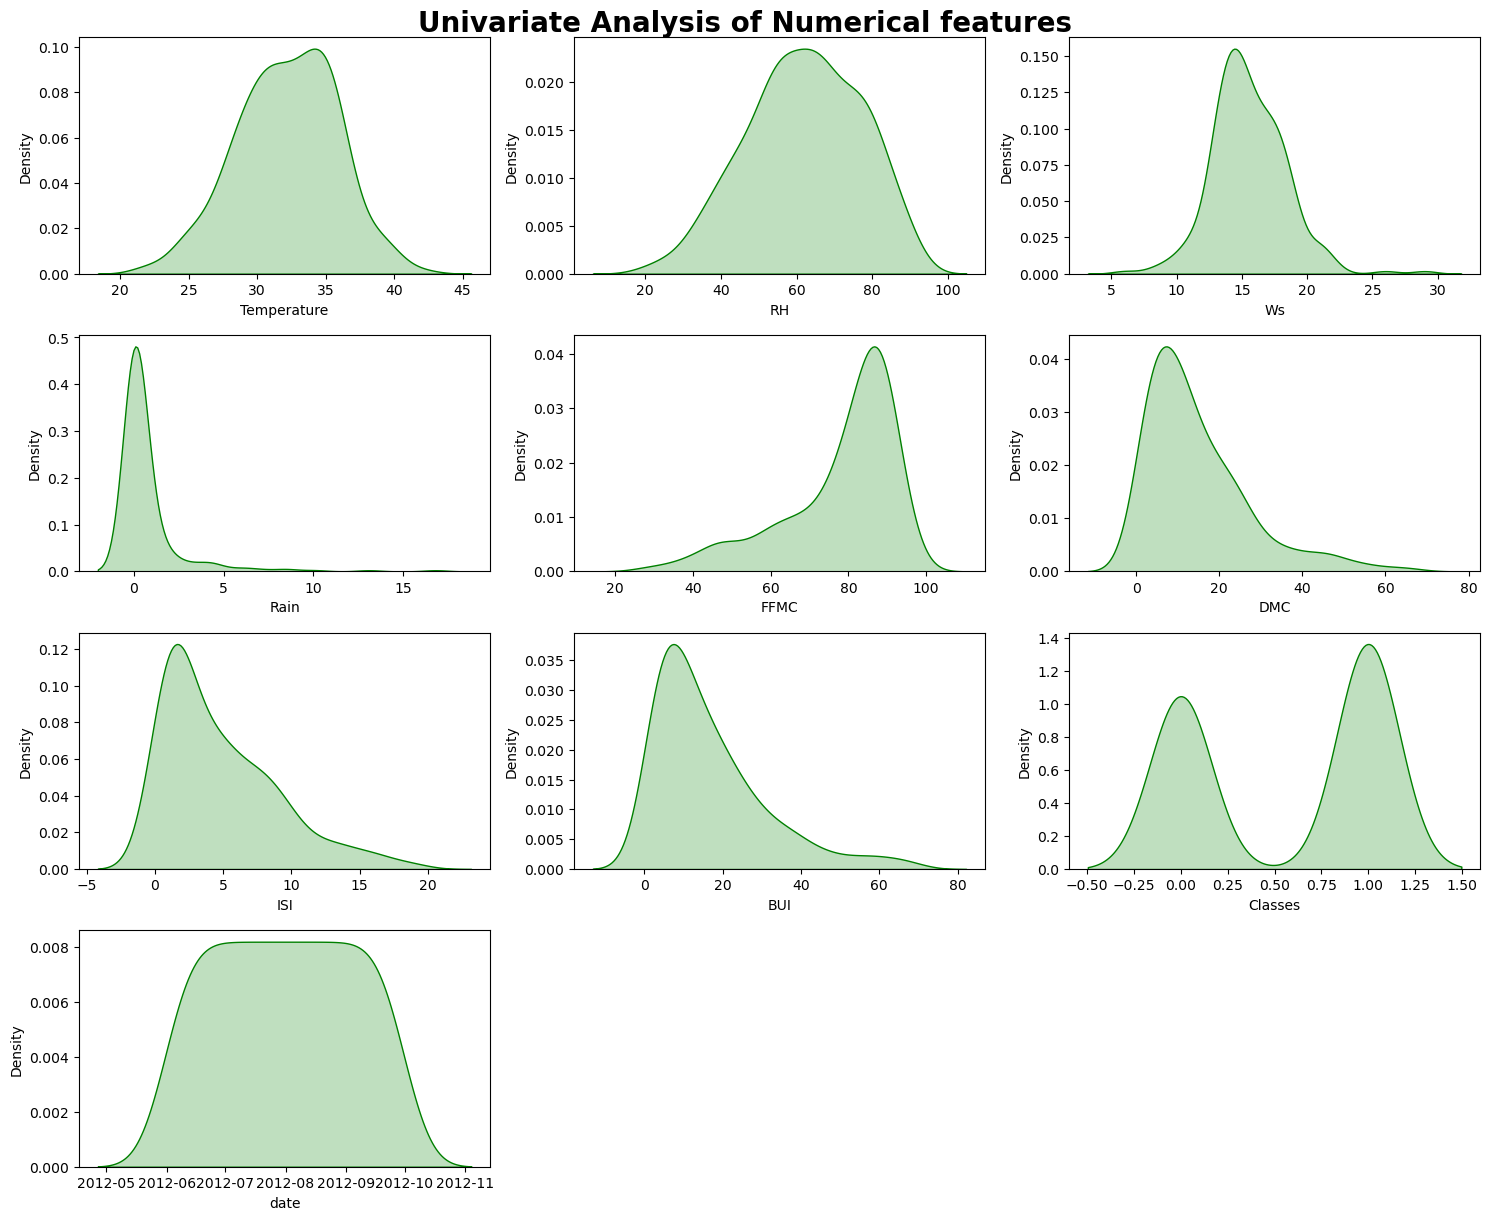

In [42]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical features',fontsize=20,fontweight='bold')

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True,color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

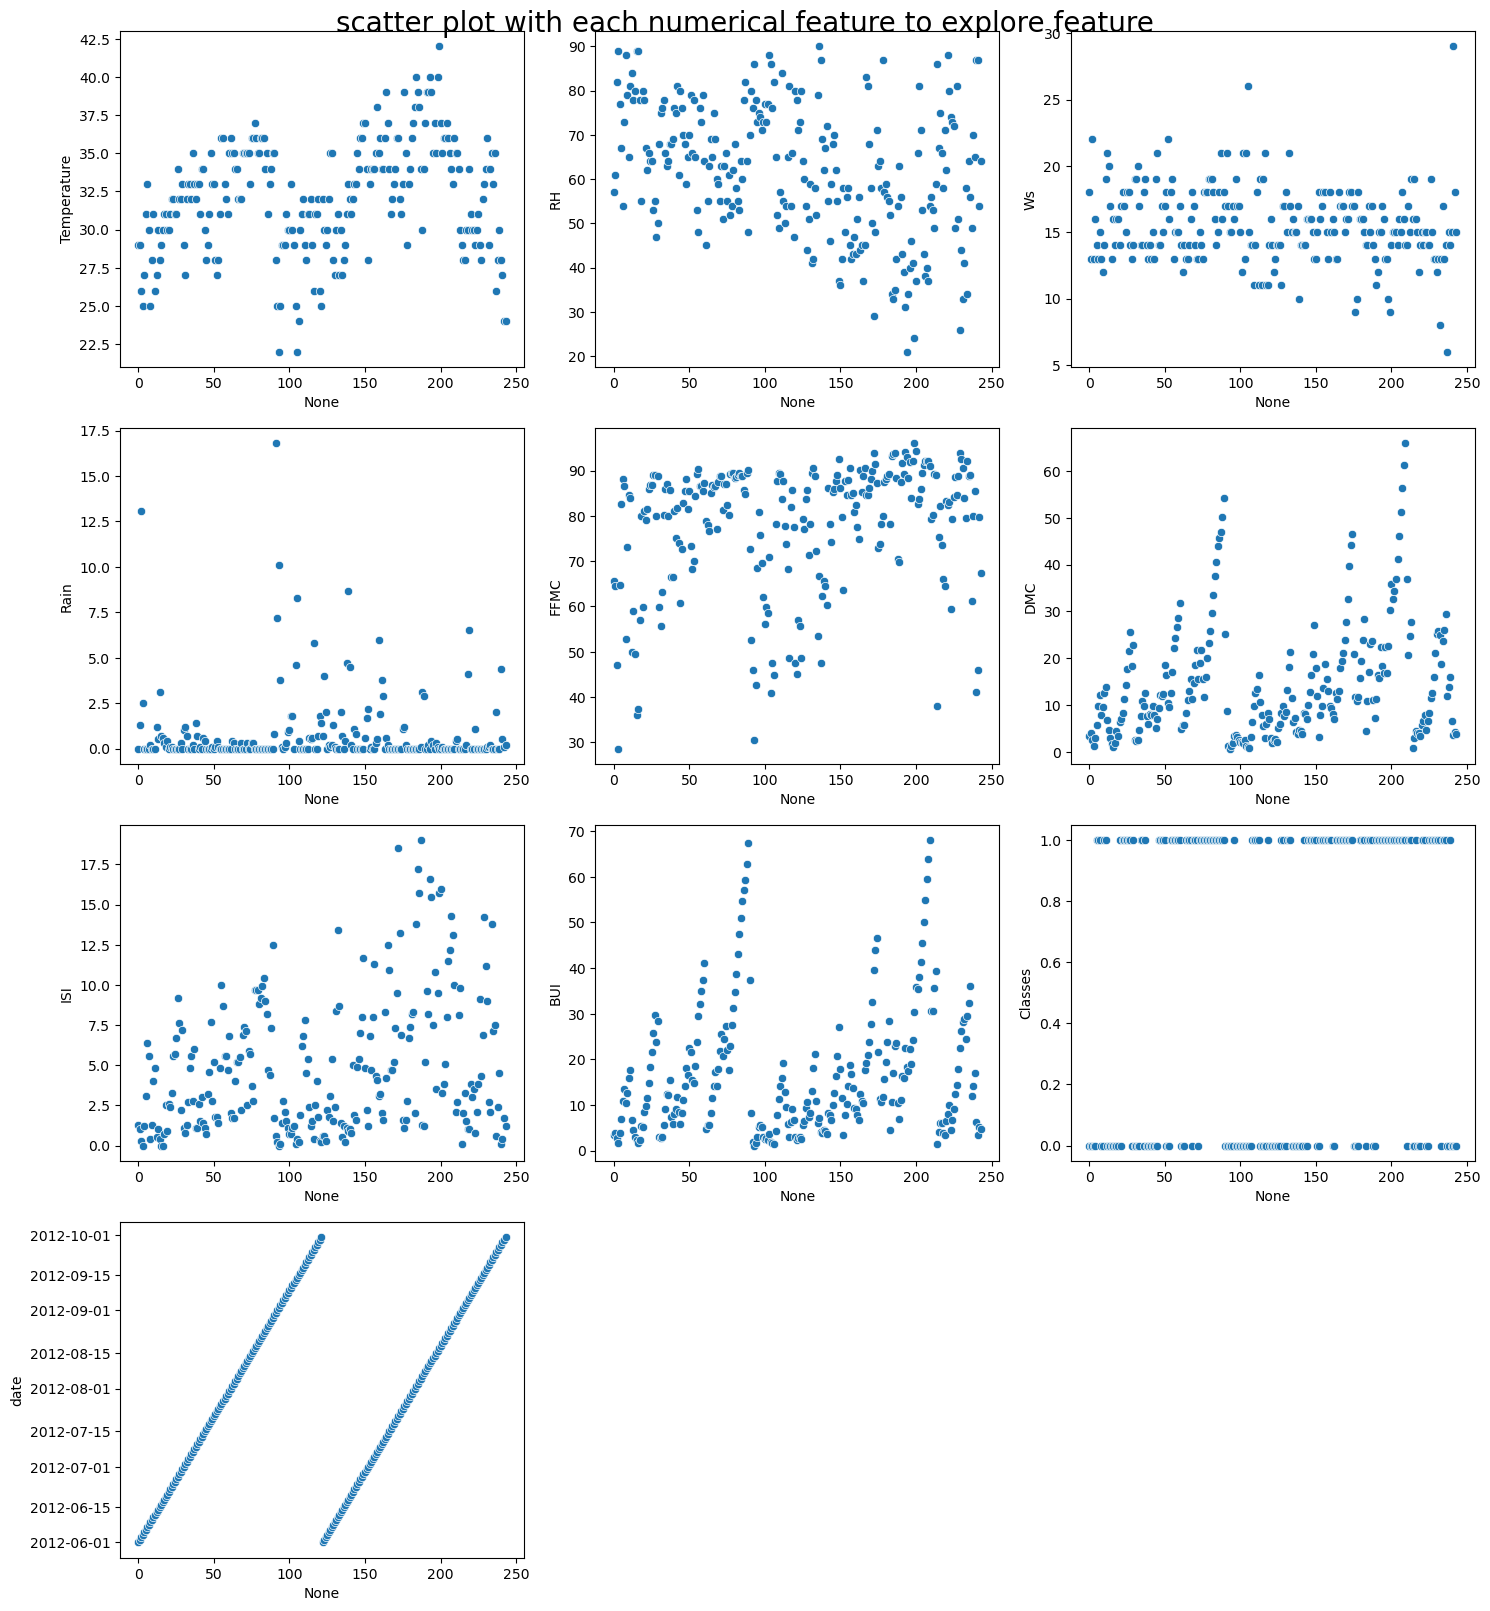

In [43]:
#scatter plot to see the trends in each numerical column

plt.figure(figsize=(15,20))
plt.suptitle('scatter plot with each numerical feature to explore feature',fontsize=20)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=numerical_features[i],x=df.index,data=df)
    plt.tight_layout()

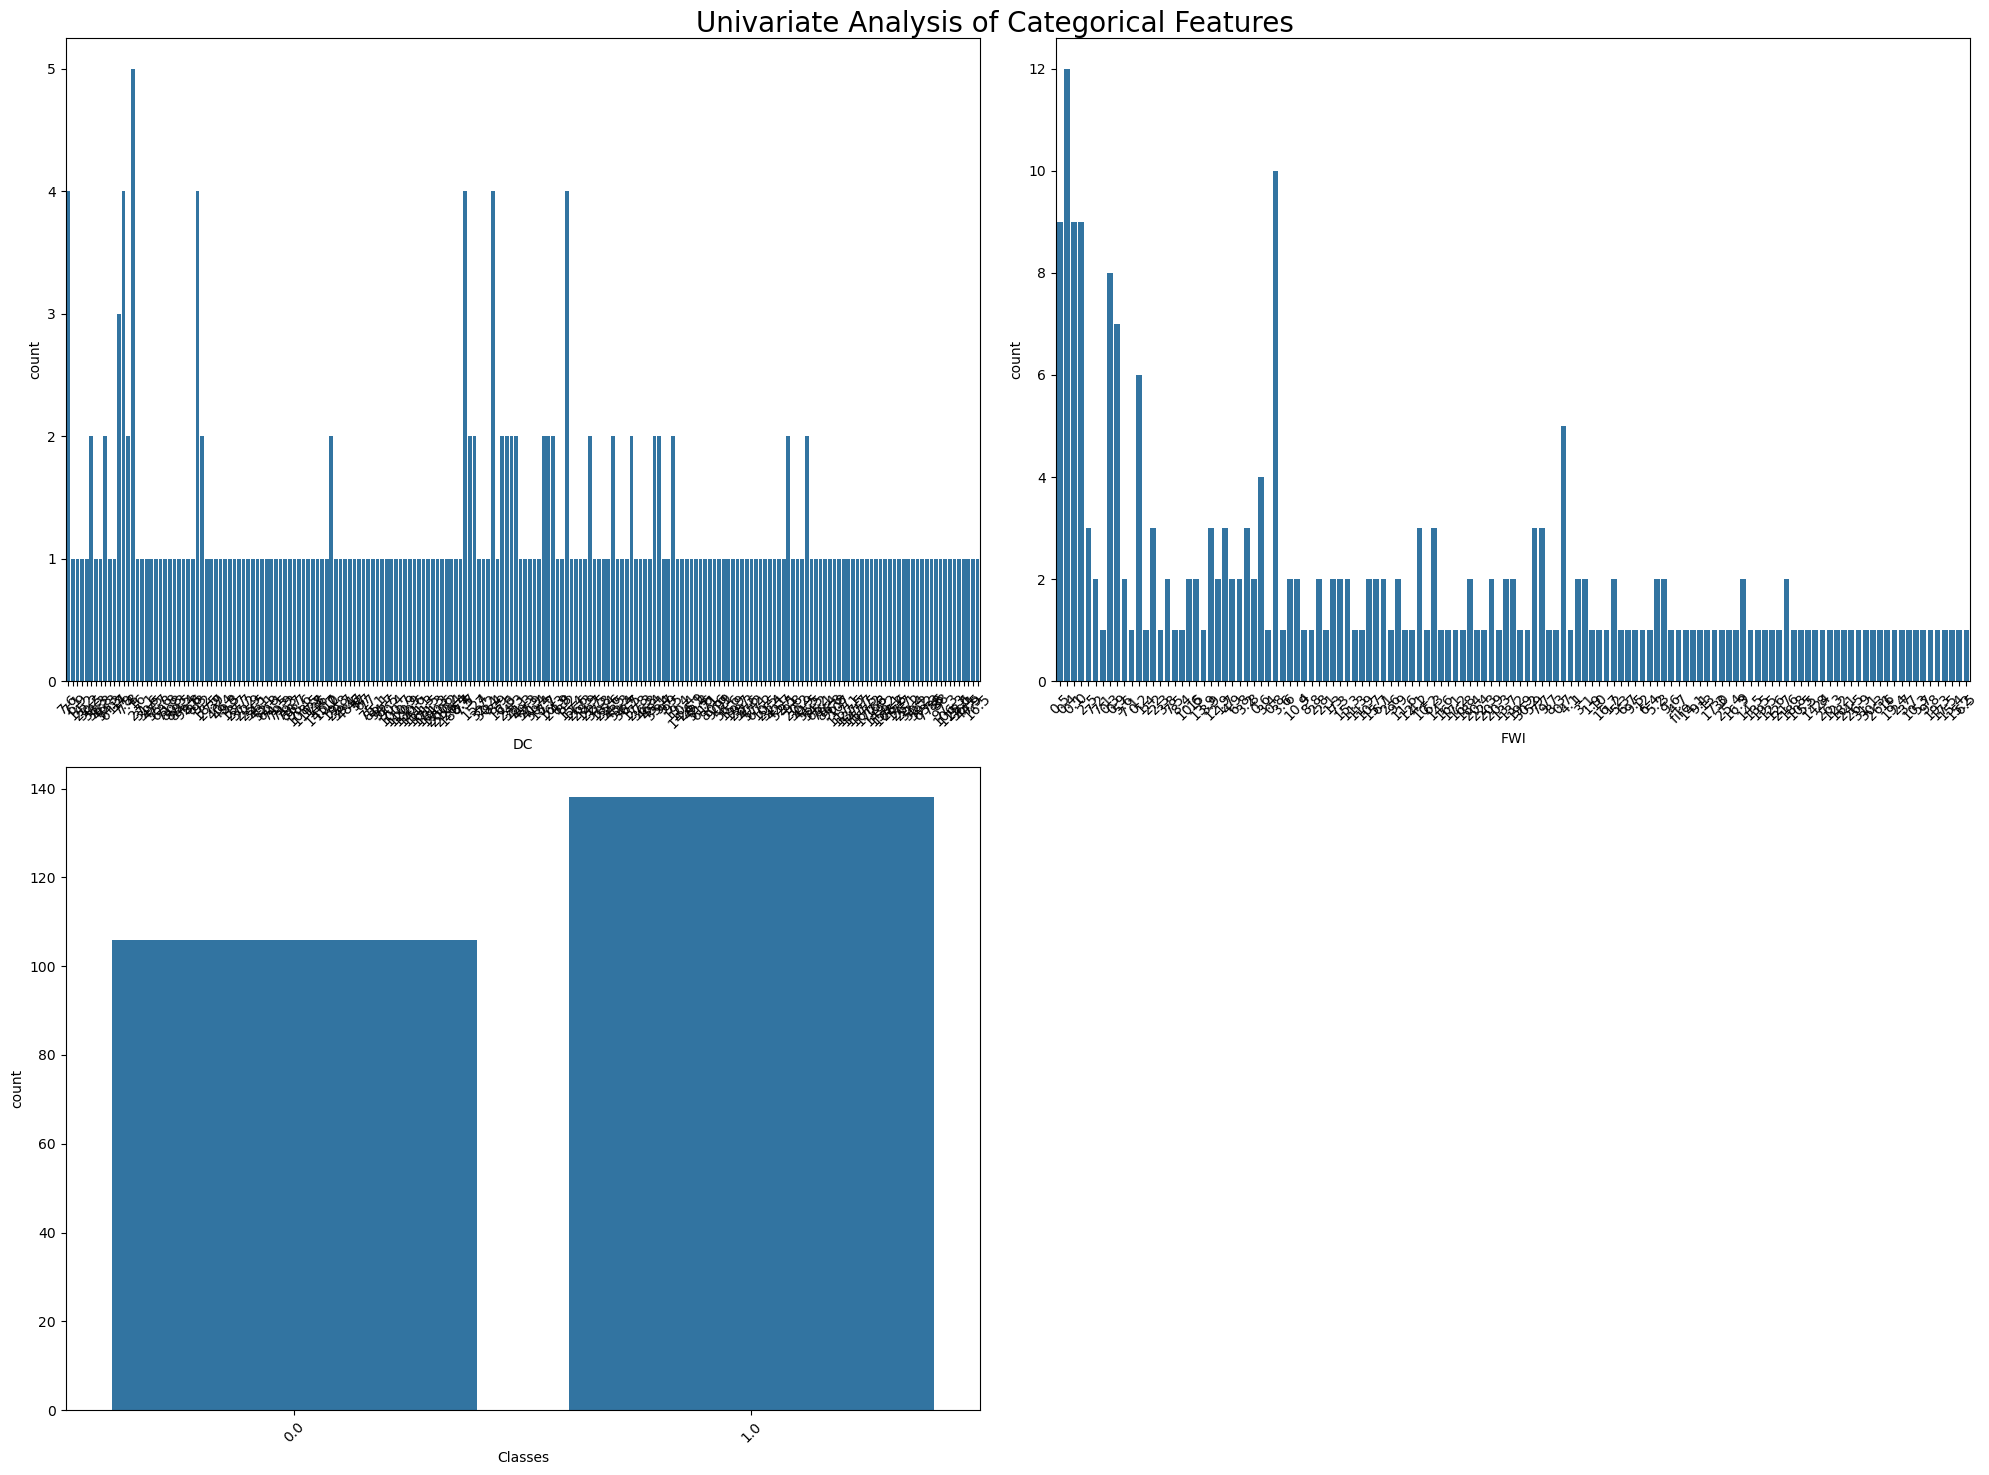

In [44]:
#categorical columns Analysis
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20)
cat1=['DC','FWI','Classes']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

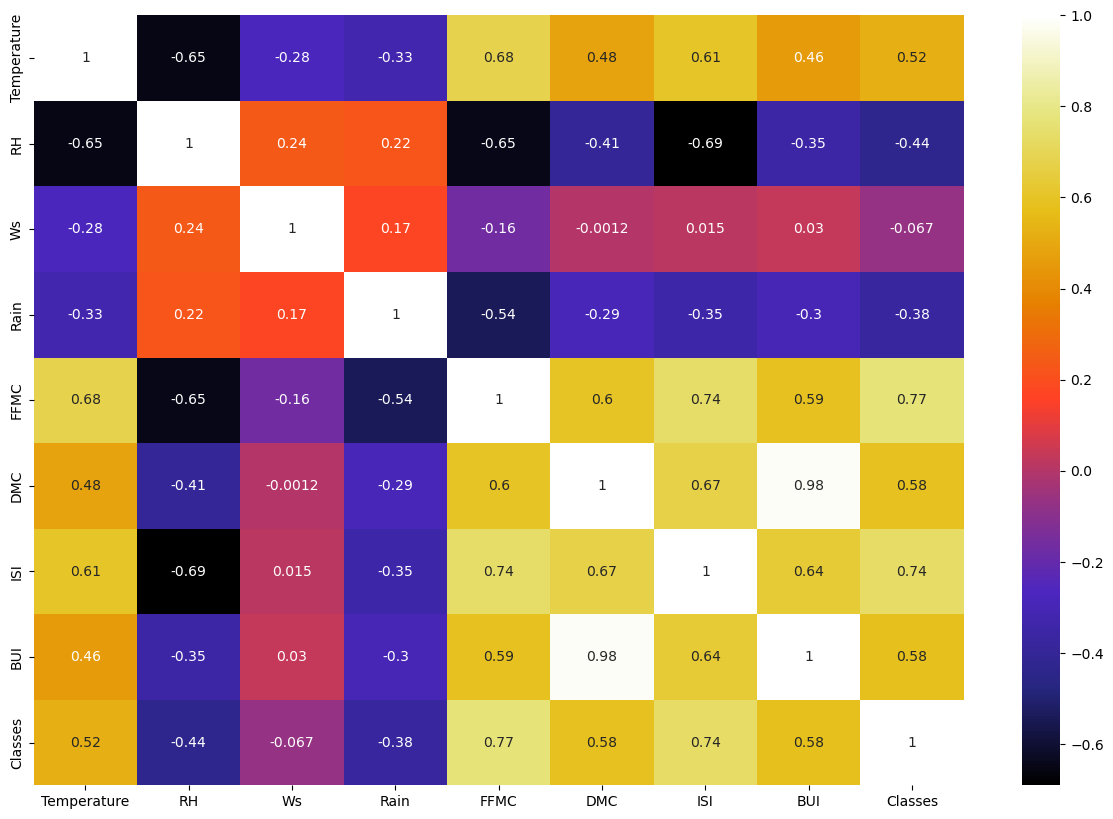

In [46]:
##Plotting HeatMap

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),cmap="CMRmap",annot=True)
plt.show


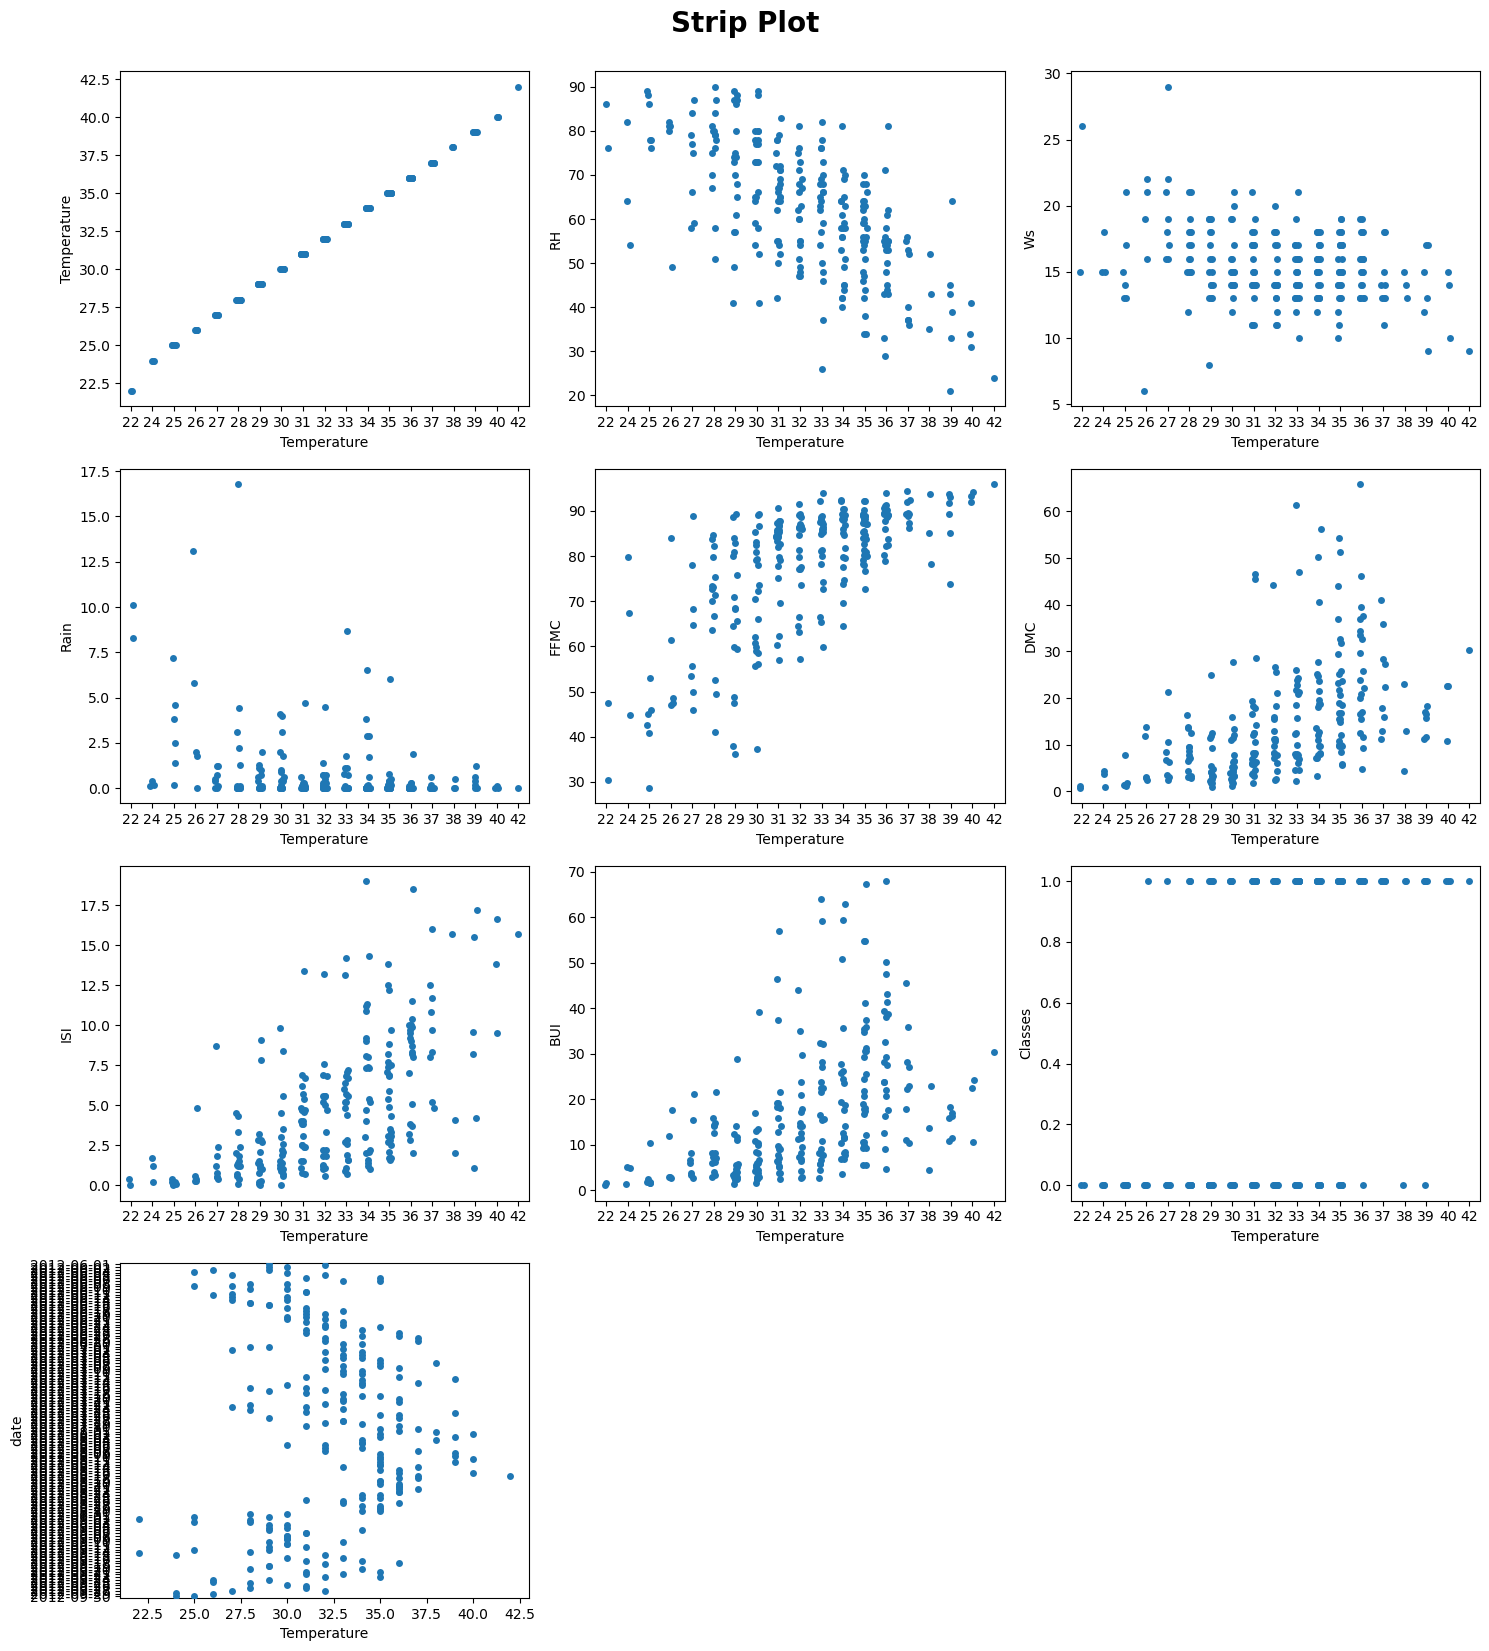

In [47]:
#strip plot to see the relationship between numerical features and target 
## Target feature is "Temperature"

plt.figure(figsize=(15,20))
plt.suptitle('Strip Plot',fontsize=20,fontweight='bold',alpha=1,y=1)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=numerical_features[i],x='Temperature',data=df)
    plt.tight_layout()

<Axes: >

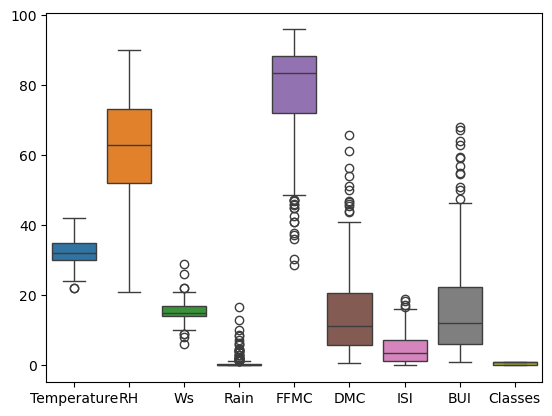

In [48]:
## BoxPlot to find outliers in the frequency
sns.boxplot(data=df,orient="v")


In [49]:
## Display summary statistics for a dataframe
df1.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


<Axes: xlabel='region', ylabel='Temperature'>

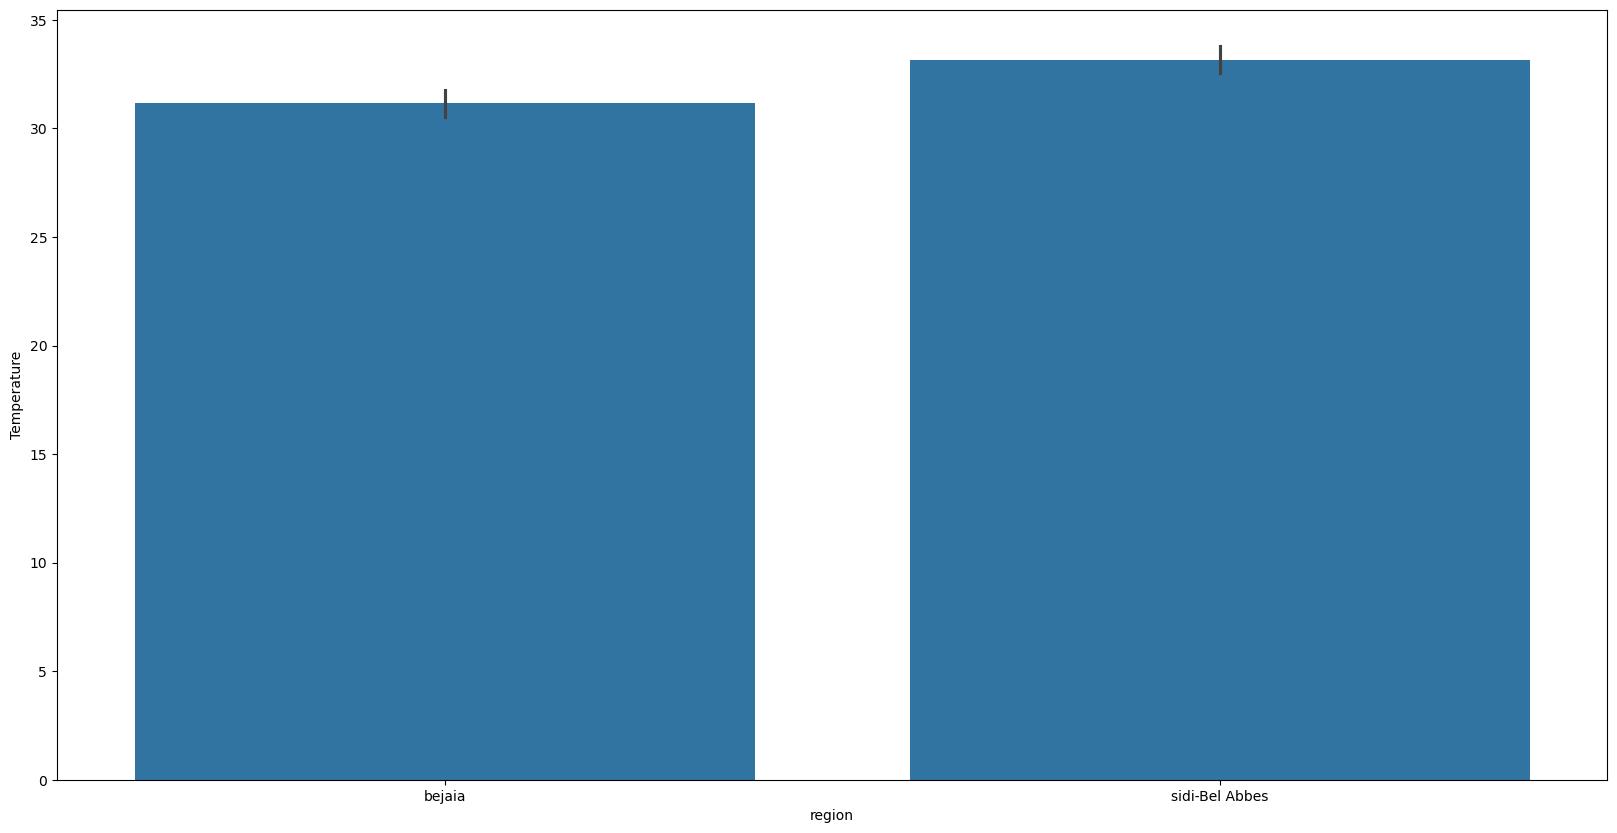

In [50]:
## which area has most of the time high temperature
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region",y="Temperature",data=df)


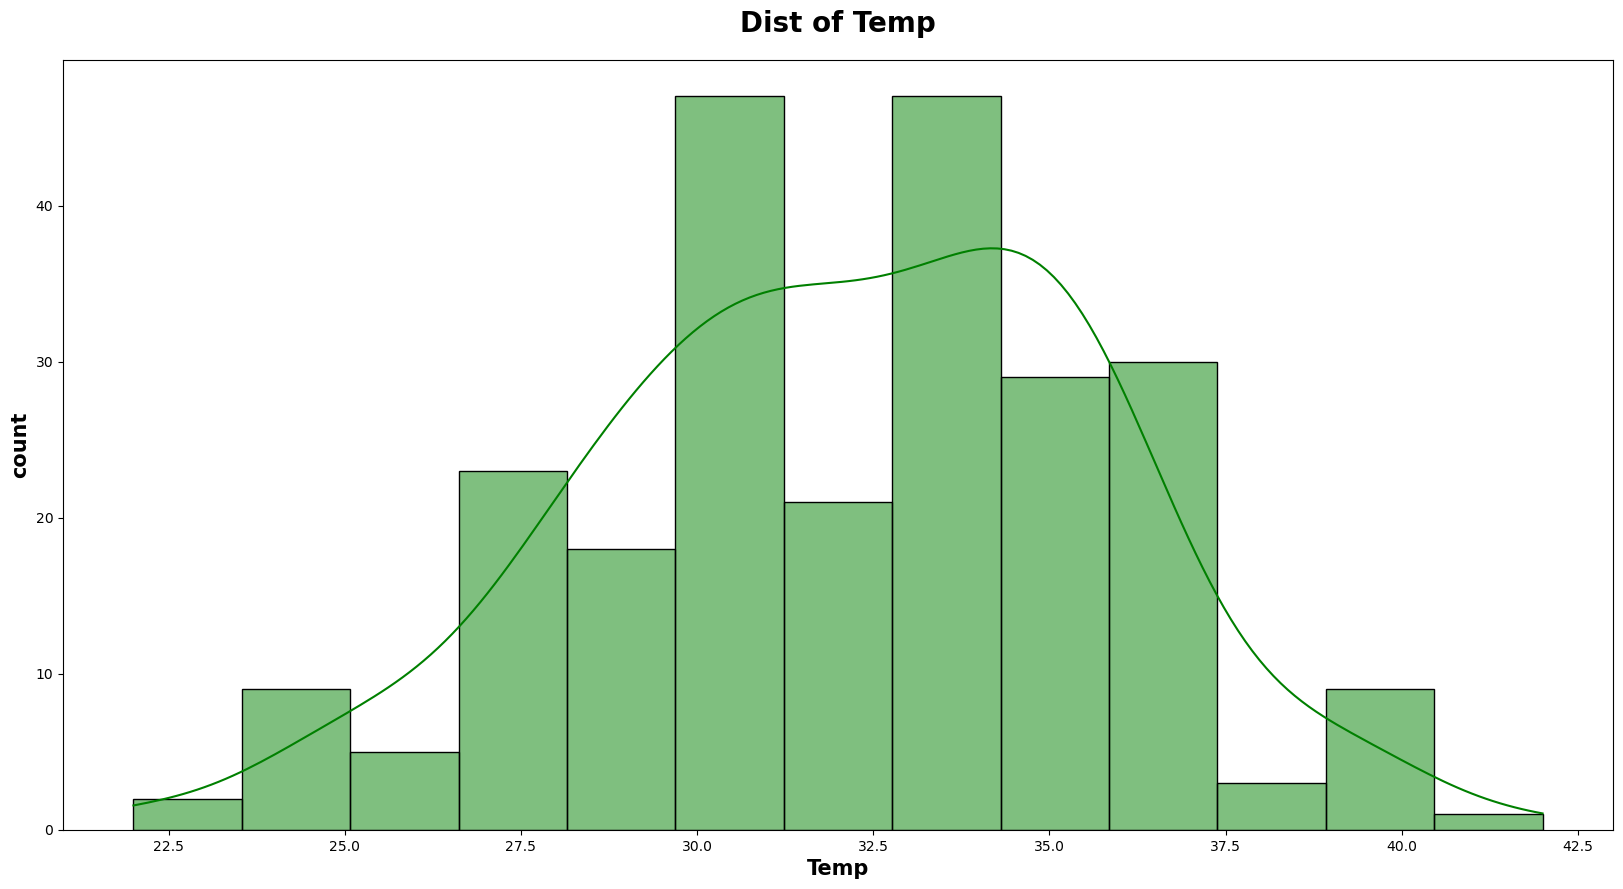

In [51]:
##Temperature range which is in most of the places
plt.subplots(figsize=(20,10))
sns.histplot(data=df['Temperature'],color='g',kde=True)
plt.title("Dist of Temp",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temp",weight='bold',fontsize=15)
plt.ylabel("count",weight='bold',fontsize=15)
plt.show()

<Axes: xlabel='Temperature', ylabel='Classes'>

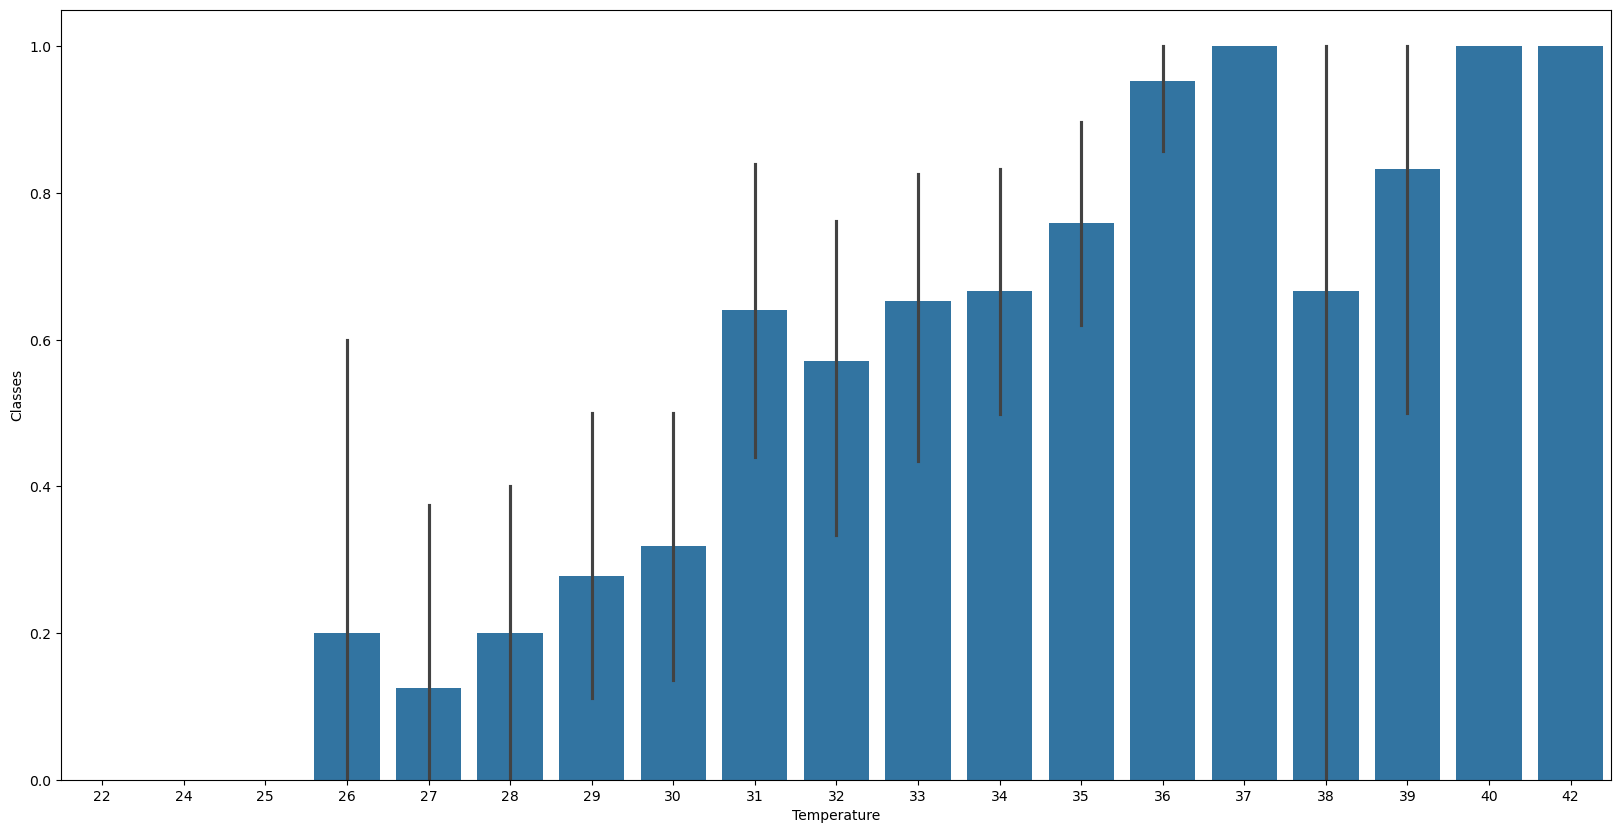

In [52]:
## Highest Temperature attained
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Temperature",y="Classes",data=df)

<Axes: xlabel='Temperature', ylabel='Rain'>

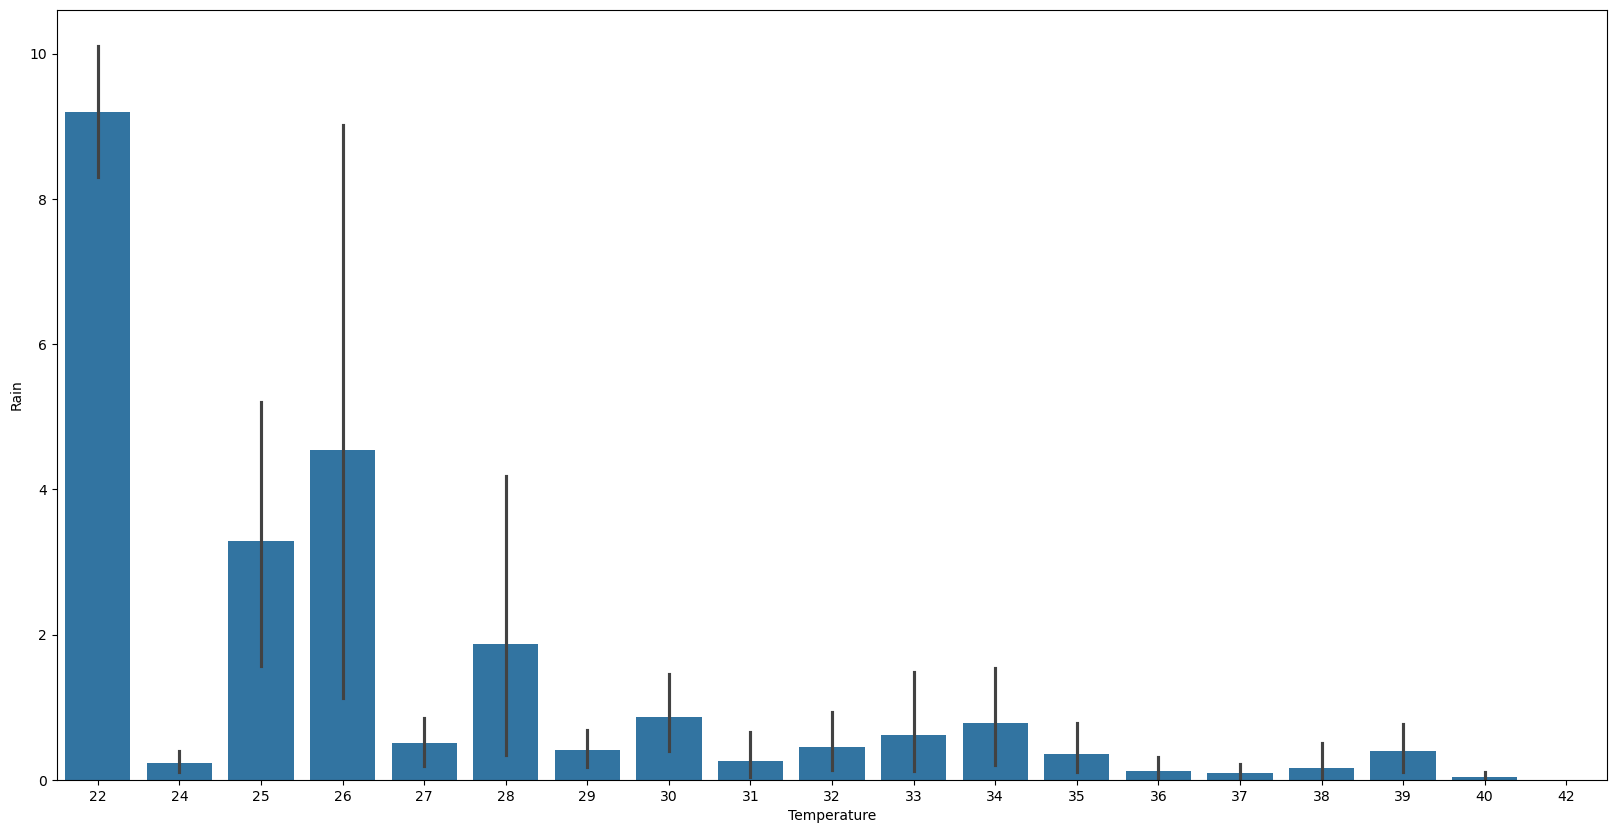

In [53]:
#What are most time rain happens in Respect with Temperatue
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="Temperature",y="Rain",data=df)

<Axes: >

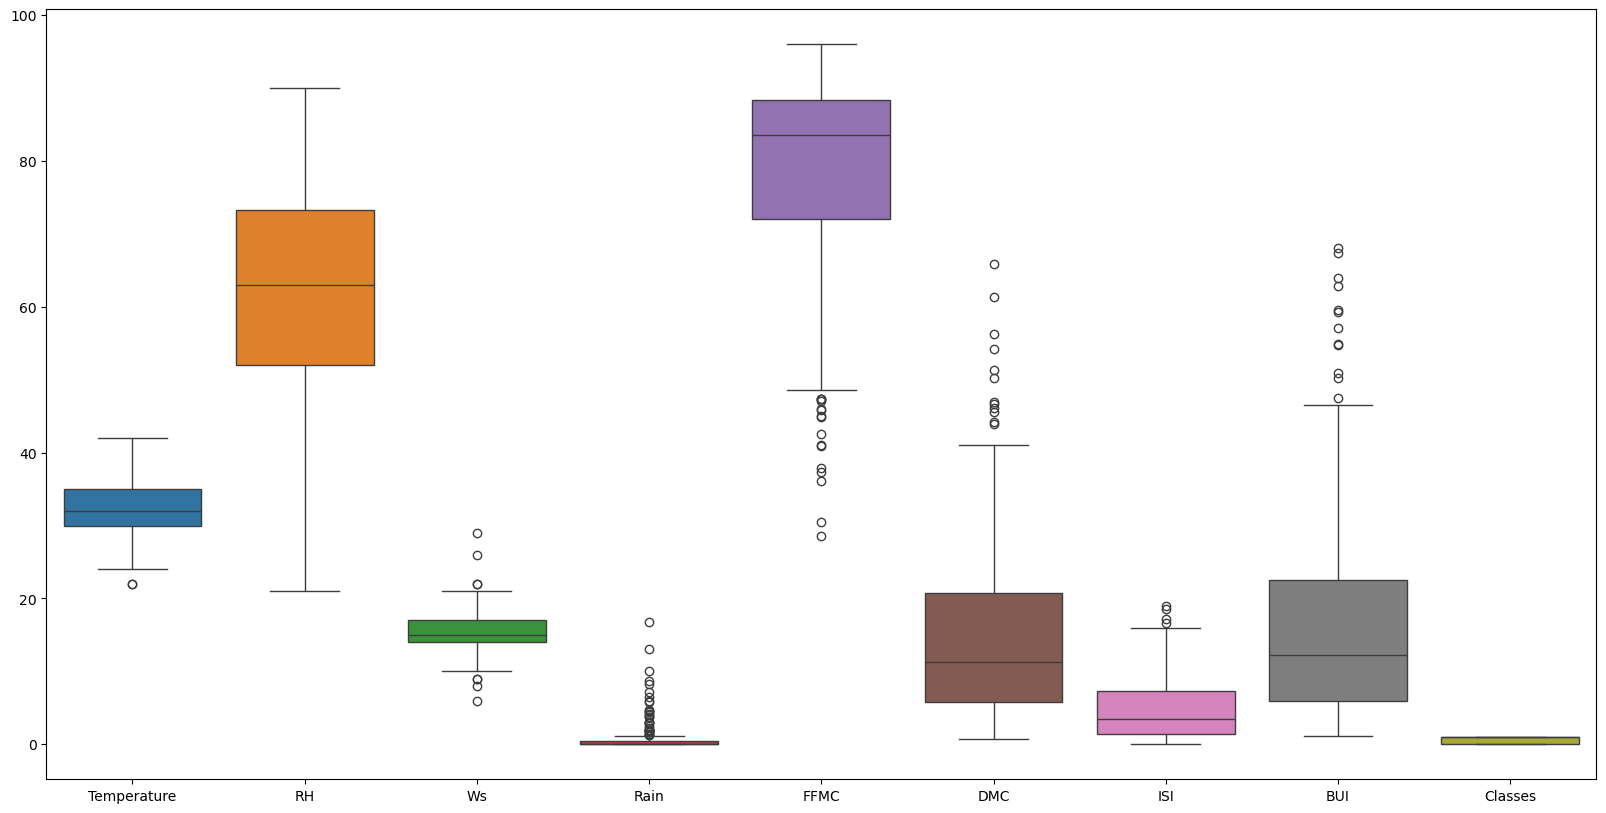

In [54]:
#Boxplot to find Outliers in the features
sns.boxplot(data=df,orient="v")

<Axes: xlabel='Classes', ylabel='Temperature'>

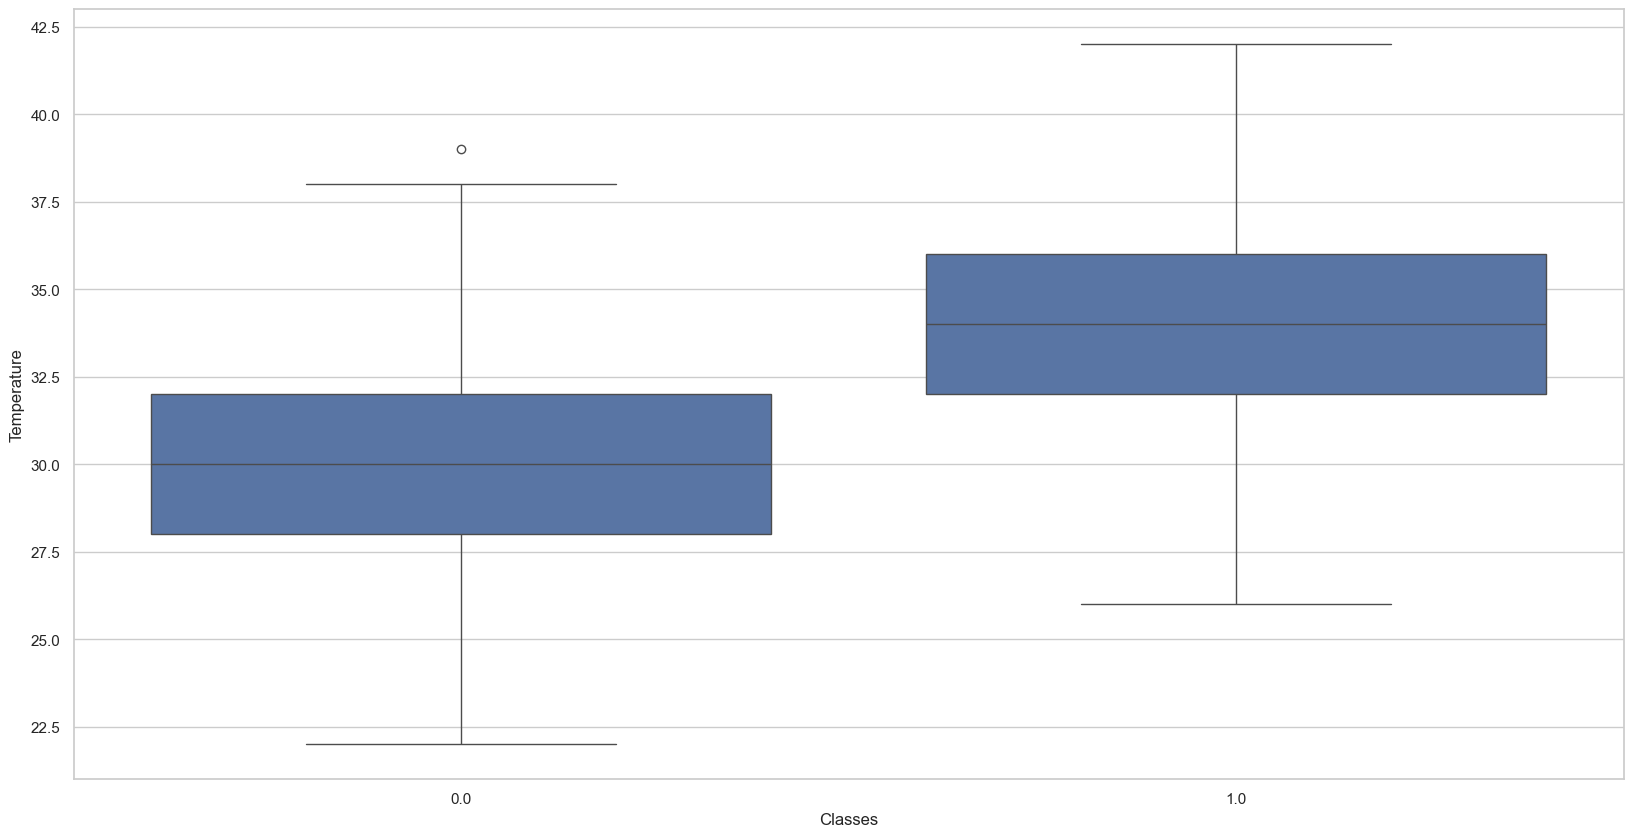

In [55]:
#Python program to illustrate 
#boxplot using inbuilt data-set
#given in seaborn


#importing the required module
import seaborn

#use to set set style of background of plot
seaborn.set(style="whitegrid")
#loading the data-set
seaborn.boxplot(x='Classes',y='Temperature',data=df)

<Axes: xlabel='Temperature', ylabel='Rain'>

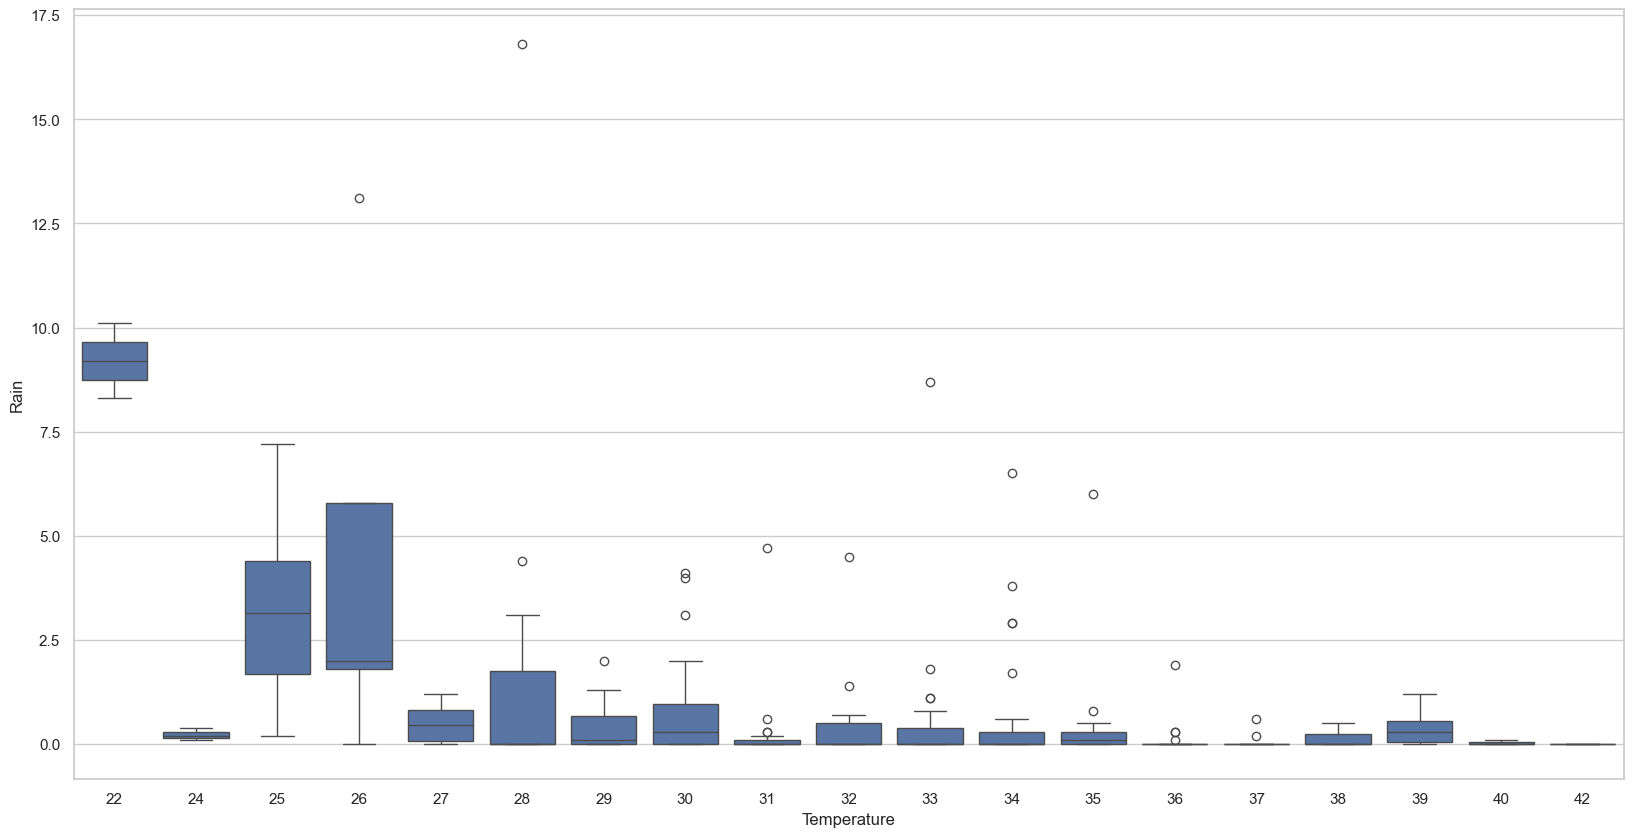

In [56]:
#Python program to illustrate 
#boxplot using inbuilt data-set
#given in seaborn


#importing the required module
import seaborn

#use to set set style of background of plot
seaborn.set(style="whitegrid")
#loading the data-set
seaborn.boxplot(x='Temperature',y='Rain',data=df)

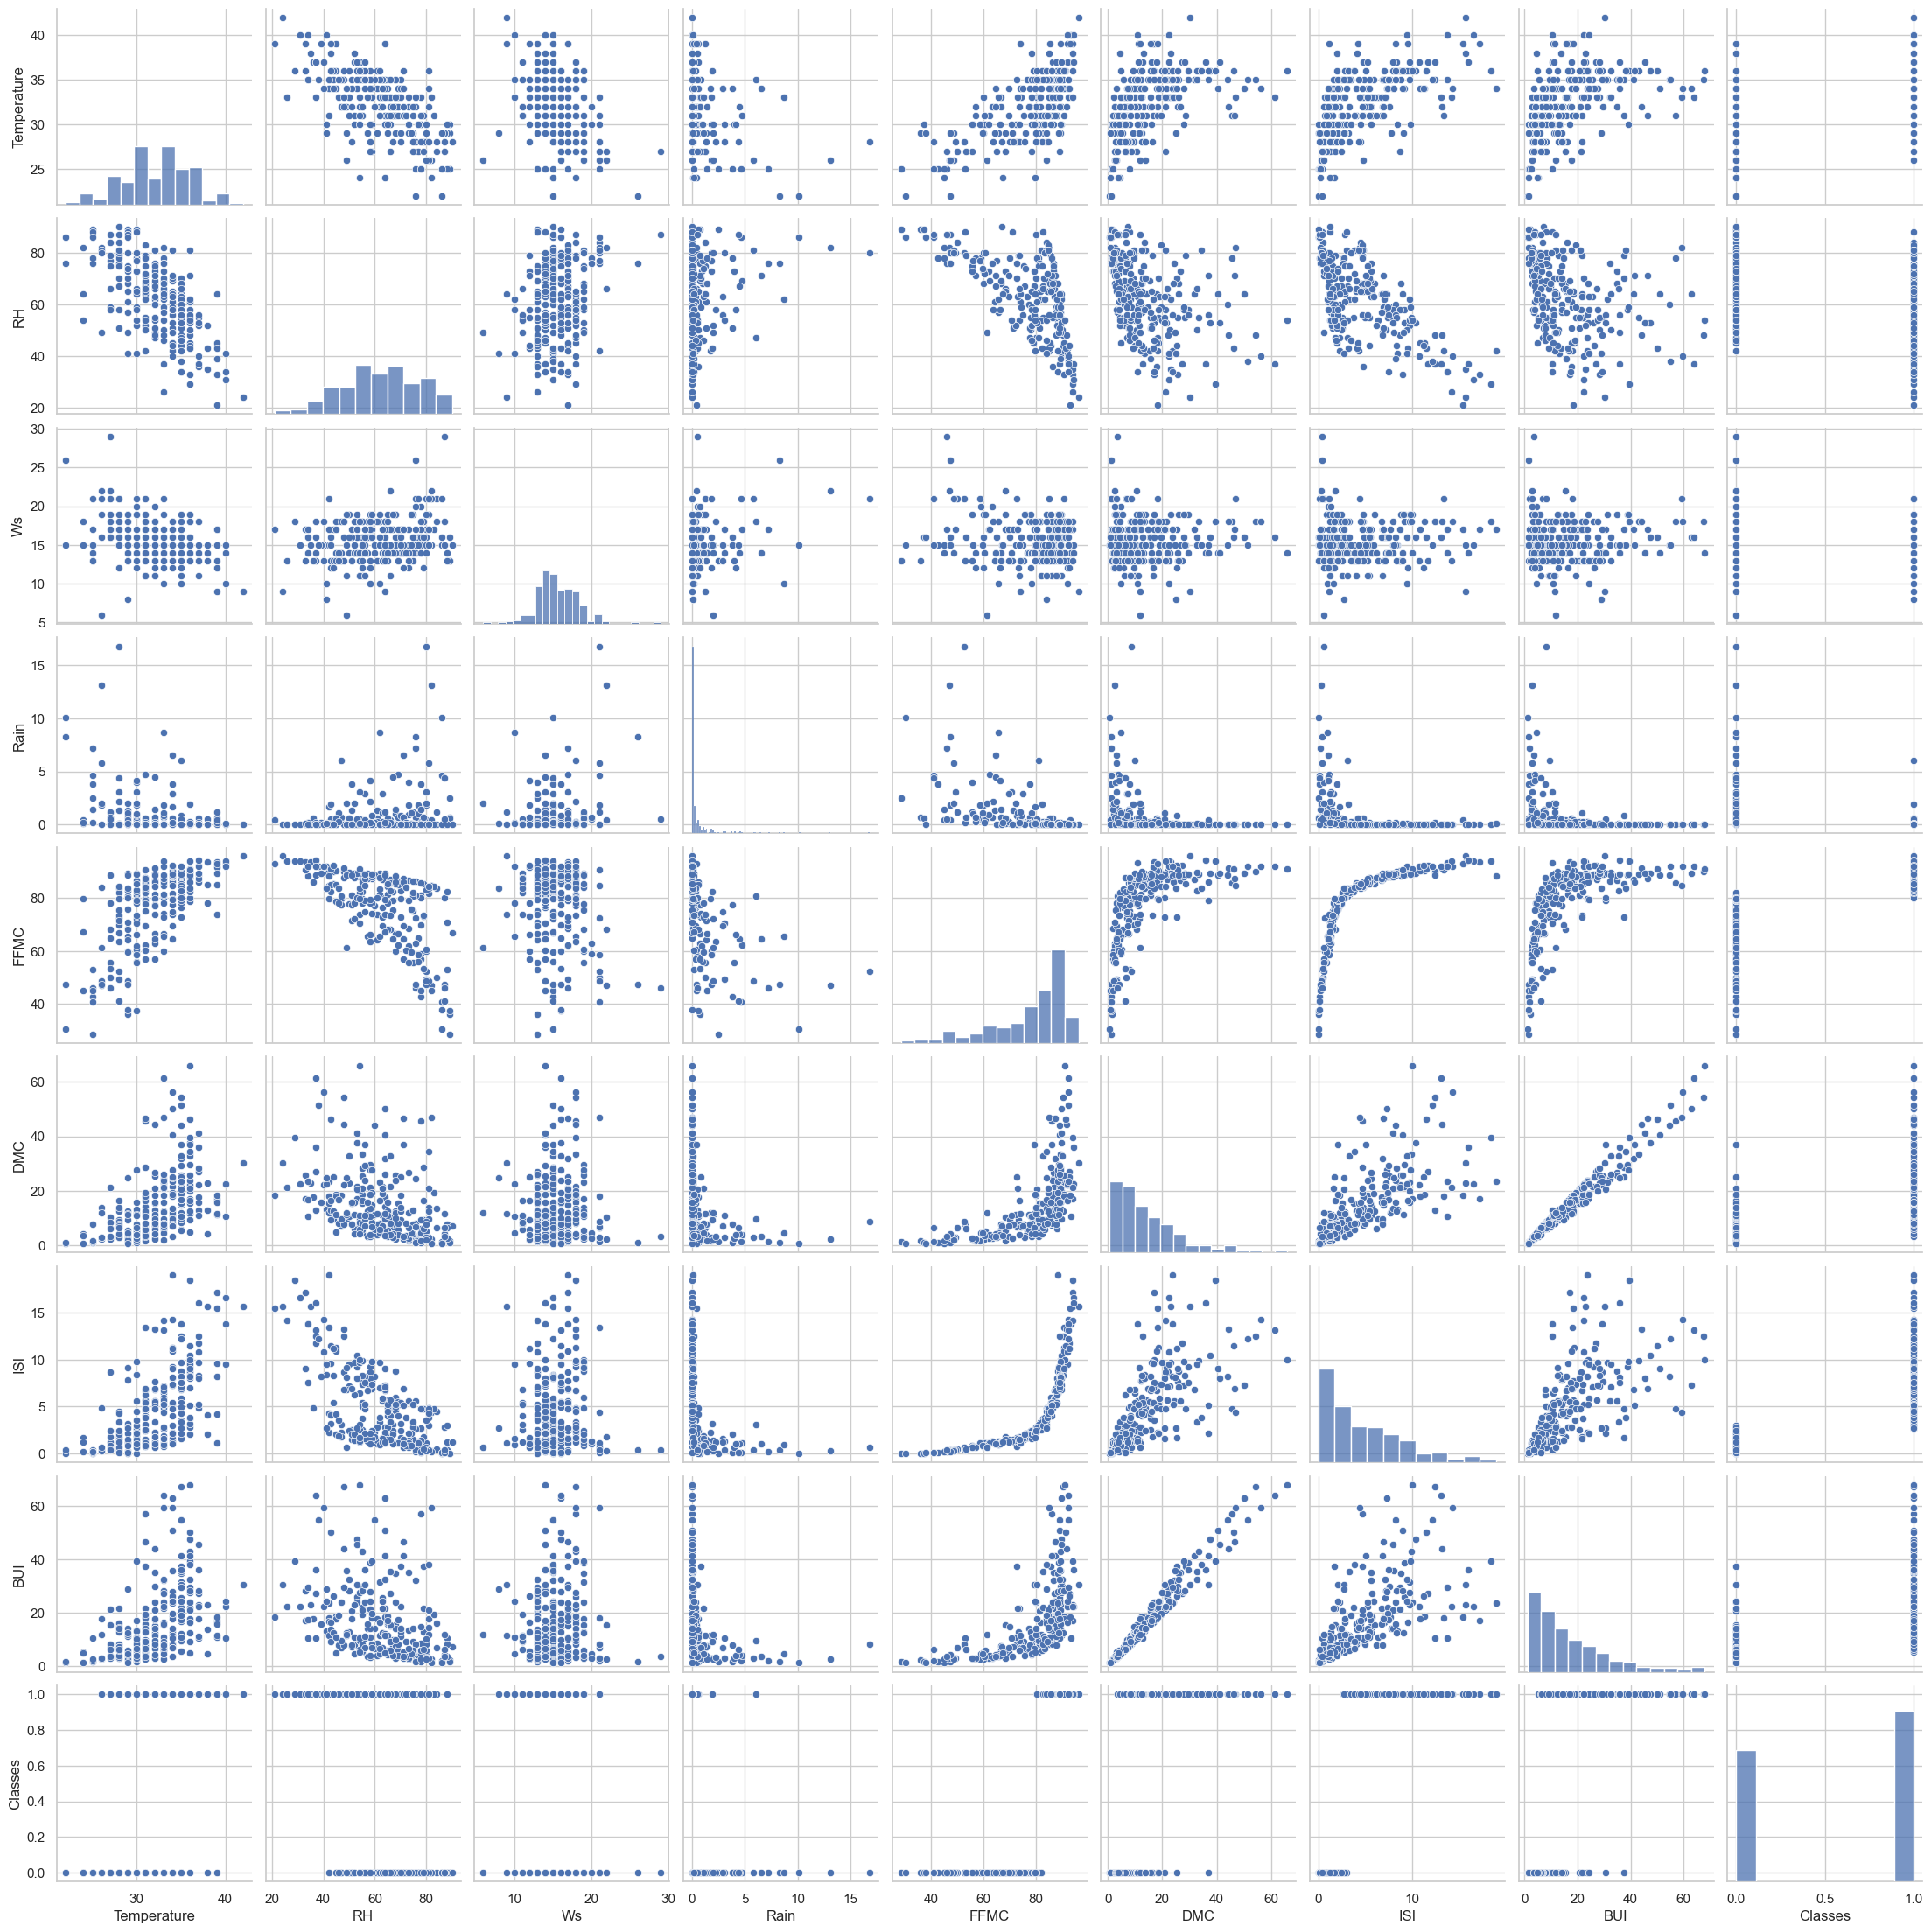

In [57]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

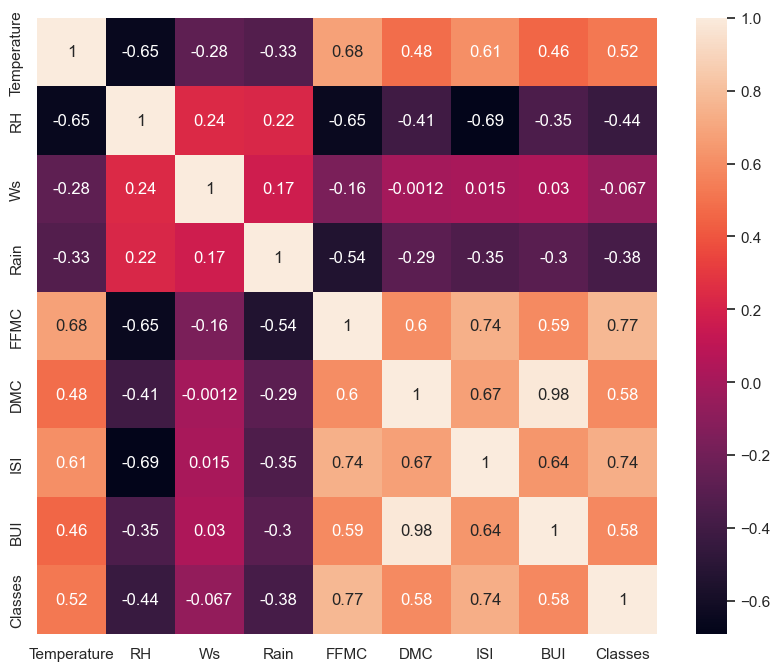

In [58]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df1.corr(),annot=True)

Text(0, 0.5, 'Temperature')

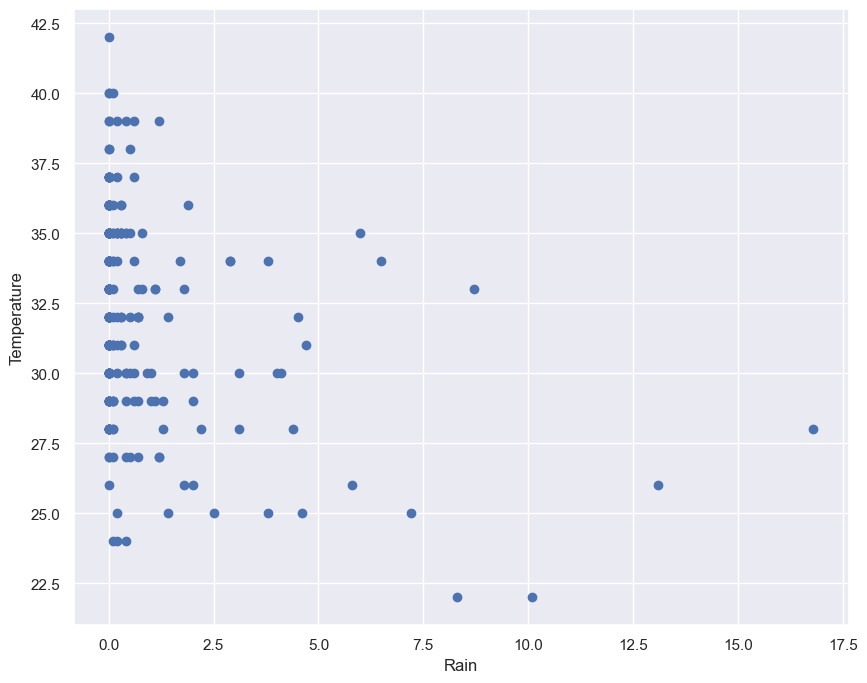

In [59]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel("Rain")
plt.ylabel("Temperature")

<Axes: xlabel='RH', ylabel='Temperature'>

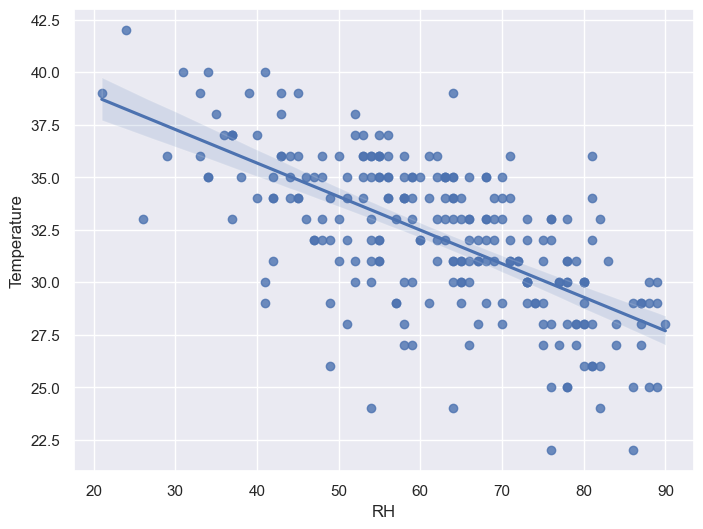

In [60]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="RH",y="Temperature",data=df)

<Axes: xlabel='FFMC', ylabel='Temperature'>

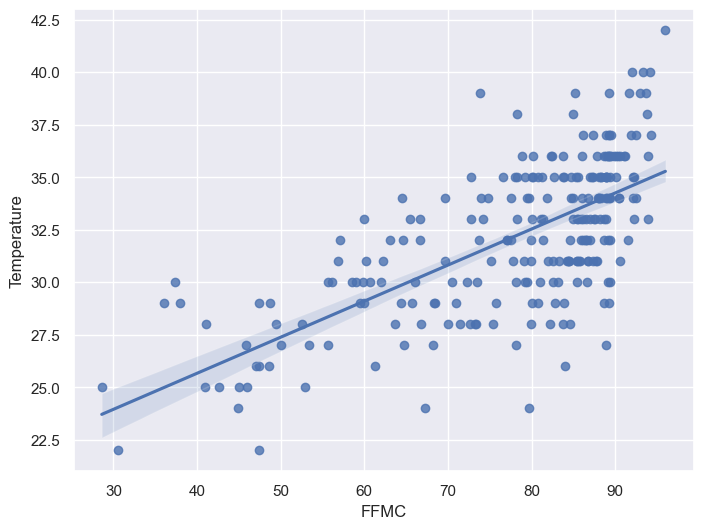

In [61]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="FFMC",y="Temperature",data=df)

<Axes: ylabel='Temperature'>

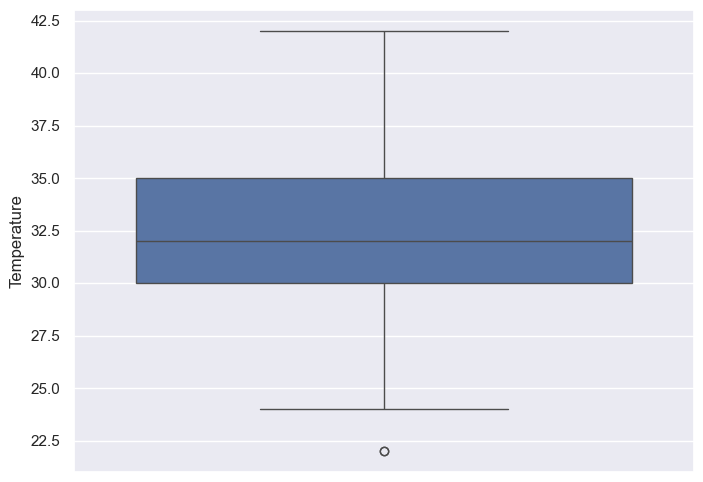

In [62]:
sns.boxplot(df['Temperature'])

<Axes: ylabel='Rain'>

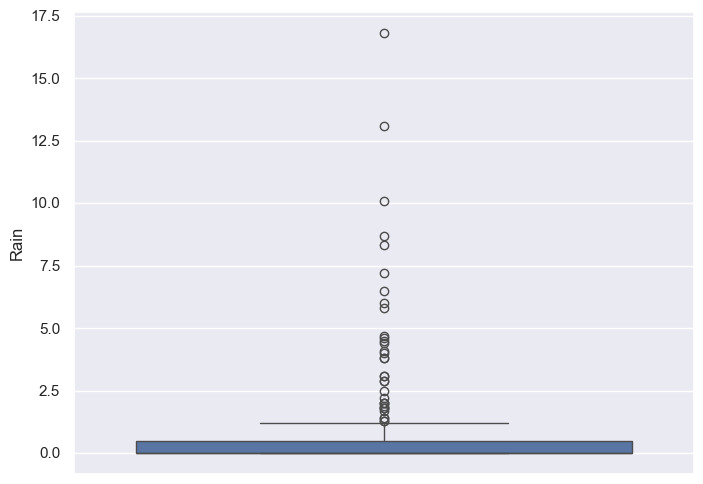

In [63]:
sns.boxplot(df1['Rain'])

In [64]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [66]:
df['DC'].dtype

dtype('O')

In [67]:
df['FWI'].dtype

dtype('O')

In [68]:
## In DC & FWI Feature there are many Object Dtype Available ,after 
df=df.drop(columns=('DC'),axis=1)
df=df.drop(columns=('FWI'),axis=1)

In [69]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0,sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0,sidi-Bel Abbes,2012-09-29


In [70]:
import numpy as np
df.info() ## Now After Data Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   ISI          244 non-null    float64       
 7   BUI          244 non-null    float64       
 8   Classes      244 non-null    float64       
 9   region       244 non-null    object        
 10  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(1)
memory usage: 19.2+ KB


In [71]:
## Independent and dependent feature
x=df.iloc[:,1:-2]
y=df.iloc[:,0]

In [72]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0


In [73]:
 #Target Feature "Temperature"
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [76]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
114,54,11.0,0.5,73.7,7.9,1.2,9.6,0.0
65,65,13.0,0.0,86.8,11.1,5.2,11.5,1.0
132,42,21.0,0.0,90.6,18.2,13.4,18.0,1.0
207,40,18.0,0.0,92.1,56.3,14.3,59.5,1.0
162,56,15.0,2.9,74.8,7.1,1.6,6.8,0.0
...,...,...,...,...,...,...,...,...
106,82,15.0,0.4,44.9,0.9,0.2,1.4,0.0
14,80,17.0,3.1,49.4,3.0,0.4,3.0,0.0
92,76,17.0,7.2,46.0,1.3,0.2,1.8,0.0
179,57,16.0,0.0,87.5,15.7,6.7,15.7,1.0


In [77]:
X_train.shape

(163, 8)

In [78]:
Y_train

114    32
65     34
132    31
207    34
162    34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 163, dtype: int32

In [79]:
Y_train.shape

(163,)

In [80]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
24,64,15.0,0.0,86.7,14.2,5.7,18.3,1.0
6,54,13.0,0.0,88.2,9.9,6.4,10.9,1.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,1.0
211,53,17.0,0.5,80.2,20.7,2.7,30.6,1.0
198,41,10.0,0.1,92.0,22.6,9.5,24.2,1.0
...,...,...,...,...,...,...,...,...
180,59,16.0,0.0,88.1,19.5,7.4,19.5,1.0
5,67,14.0,0.0,82.6,5.8,3.1,7.0,1.0
56,48,13.0,0.0,90.3,22.2,8.7,29.4,1.0
125,64,14.0,0.0,79.4,5.2,2.2,5.6,0.0


In [81]:
X_test.shape

(81, 8)

In [82]:
Y_test.shape

(81,)

In [83]:
## Standardize or Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [84]:
scaler

StandardScaler()

In [85]:
X_train =scaler.fit_transform(X_train)

In [86]:
X_test=scaler.transform(X_test)

In [87]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.80014076,
        -0.47763563, -1.04390785],
       [ 0.14460201, -0.93856657, -0.39436188, ...,  0.16132584,
        -0.3471914 ,  0.95793896],
       [-1.41768313,  2.04653297, -0.39436188, ...,  2.13233237,
         0.09906517,  0.95793896],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.04050741,
        -1.01314351, -1.04390785],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.52187581,
        -0.058841  ,  0.95793896],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.82417743,
        -0.9719506 , -1.04390785]])

In [88]:
X_test

array([[ 0.07667657, -0.19229169, -0.39436188,  0.67685449, -0.03052244,
         0.28150916,  0.11966162,  0.95793896],
       [-0.60257784, -0.93856657, -0.39436188,  0.77931297, -0.37009673,
         0.44976582, -0.38838431,  0.95793896],
       [-1.01013048,  0.18084575, -0.39436188,  0.73832958, -0.52803826,
         0.54591248, -0.60121437,  0.95793896],
       [-0.67050328,  0.5539832 , -0.17054229,  0.23286778,  0.48278753,
        -0.43959079,  0.96411636,  0.95793896],
       [-1.48560857, -2.0579789 , -0.34959796,  1.03887443,  0.63283198,
         1.19490243,  0.52472528,  0.95793896],
       [ 0.07667657, -2.43111635,  0.14280514, -0.20428836, -0.22794936,
        -0.82417743, -0.35405689, -1.04390785],
       [-1.62145945, -0.19229169, -0.30483404,  0.85444918,  0.09583078,
         0.88242579, -0.05197552,  0.95793896],
       [ 1.16348363, -0.56542913,  0.50091648, -1.91876013, -0.97817163,
        -1.01647075, -0.95821962, -1.04390785],
       [ 1.09555819, -1.31170402

In [89]:
pd.DataFrame(X_test).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [90]:
X_test1=pd.DataFrame(X_test).fillna(0)

In [91]:
##Linear Regression
from sklearn.linear_model import LinearRegression

In [92]:
regression=LinearRegression()

regression

LinearRegression()

In [93]:
regression.fit(X_train,Y_train)

LinearRegression()

In [94]:
## print the coefficients
print(regression.coef_)

[-1.04543262 -0.47357018  0.10021995  1.82327758  0.12573135  0.17088561
  0.24335231 -0.26484938]


In [95]:
## print the intercept
print(regression.intercept_)

31.98159509202454


In [96]:
## prediction for test data
reg_pred=regression.predict(X_test1) 

In [97]:
reg_pred

array([33.00674784, 34.11950967, 33.8855133 , 32.79419423, 36.52615796,
       32.71539397, 35.19161778, 27.33139756, 30.99796245, 29.58586948,
       29.42460255, 33.4274263 , 33.95352094, 33.48023065, 34.19311614,
       32.19700985, 36.97985439, 25.21750399, 32.26401384, 33.50420952,
       30.93833937, 28.3669283 , 34.99954884, 28.69083985, 36.52529739,
       26.82074265, 32.70997918, 33.27291072, 32.91903121, 34.58048311,
       34.51522327, 31.57661772, 32.62103567, 33.31912978, 32.71199731,
       33.38364766, 30.30169034, 34.25125238, 31.78783181, 23.79809099,
       33.47076807, 33.73980521, 32.48126685, 24.81636379, 36.06878401,
       32.43639042, 31.25547958, 30.55355193, 35.25600003, 34.59119977,
       36.96746325, 30.86723899, 31.05572071, 34.39878504, 33.69137609,
       32.28932331, 36.99087506, 32.36649978, 30.1224896 , 36.46783802,
       33.08294334, 30.02673524, 33.96201881, 32.01368053, 31.86600619,
       24.78309326, 33.14413455, 30.60056421, 36.77240924, 34.81

In [98]:
##Assumption of linear Regression

import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Test Predicted Data')

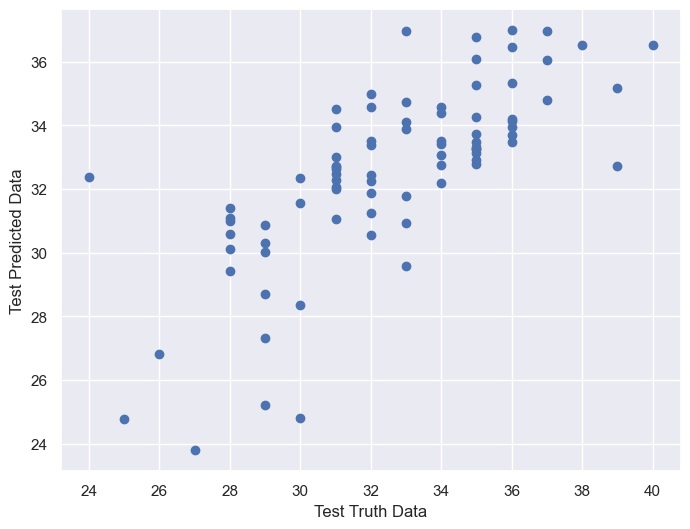

In [99]:
##Relationship between real data and predicted data
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [100]:
##calculating residuals
residuals=Y_test-reg_pred

In [101]:
residuals

24    -2.006748
6     -1.119510
153   -0.885513
211    2.205806
198    3.473842
         ...   
180    0.498044
5     -1.080813
56     0.667201
125   -2.359191
148    1.852486
Name: Temperature, Length: 81, dtype: float64

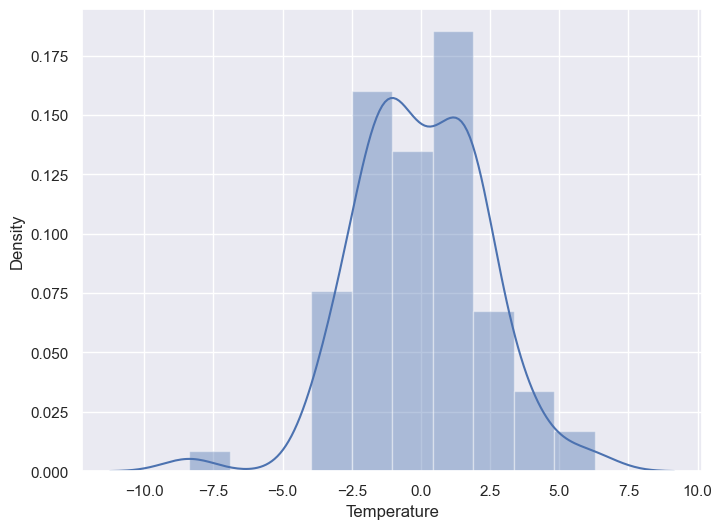

In [102]:
##Distribution of rsidual are approximately normal distribution
sns.distplot(residuals)
plt.show()

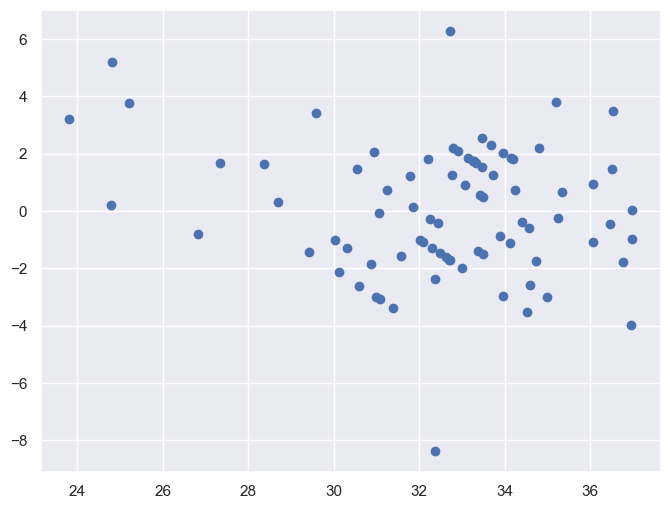

In [103]:
##Scatter Plot with predictions and residual
### Uniform Distributions
plt.scatter(reg_pred,residuals)

In [104]:
##Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

5.199575881104855
1.8282040182595618
2.280257854082484


In [105]:
##R squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.5159015558971343


In [106]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.46211283988570473

In [107]:
##Ridge Regression
from sklearn.linear_model import Ridge

In [108]:
ridge=Ridge()

In [109]:
ridge

Ridge()

In [110]:
ridge.fit(X_train,Y_train)

Ridge()

In [111]:
## print the coefficients
print(ridge.coef_)

[-1.04932886 -0.47029401  0.08545865  1.77827403  0.15276581  0.17388586
  0.21977498 -0.24005732]


In [112]:
##print the intercept
print(ridge.intercept_)

31.98159509202454


In [113]:
X_test1=pd.DataFrame(X_test).fillna(0)

In [114]:
## prediction for the test data
ridge_pred=ridge.predict(X_test1)

In [115]:
ridge_pred

array([33.00212697, 34.1137824 , 33.8879223 , 32.80341017, 36.51568241,
       32.68804806, 35.19356487, 27.37118636, 30.97359274, 29.59208532,
       29.4150637 , 33.39026671, 33.91124675, 33.44804211, 34.19125629,
       32.20003477, 36.98306124, 25.30037452, 32.25989568, 33.50553302,
       30.90085351, 28.38456091, 34.98843863, 28.71282758, 36.52507912,
       26.86914109, 32.70982538, 33.26815015, 32.90420468, 34.58587507,
       34.50795022, 31.55466359, 32.62283999, 33.31693021, 32.67961981,
       33.35697339, 30.27785966, 34.25861991, 31.73422244, 23.87443546,
       33.47287743, 33.74181292, 32.45768038, 24.89956394, 36.06658122,
       32.43669529, 31.26506116, 30.55000599, 35.26265866, 34.58694412,
       36.98622089, 30.87528415, 31.06420278, 34.39193789, 33.68709885,
       32.29094146, 37.00619342, 32.33676647, 30.12721002, 36.46744708,
       33.08675782, 30.02833748, 33.96737025, 32.01433068, 31.84209262,
       24.83587768, 33.1439239 , 30.60459539, 36.78271896, 34.82

Text(0, 0.5, 'Test Predicted Data')

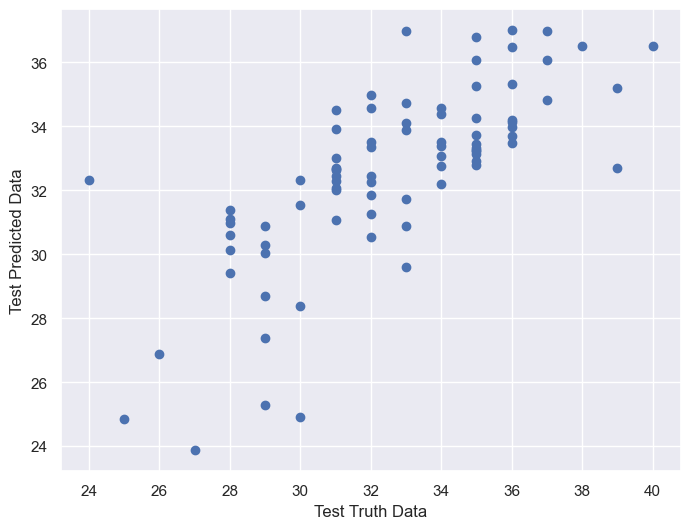

In [116]:
## relationship between real data & predicted data
plt.scatter(Y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [117]:
## Calculating residuals
residuals=Y_test-ridge_pred

In [118]:
residuals

24    -2.002127
6     -1.113782
153   -0.887922
211    2.196590
198    3.484318
         ...   
180    0.493825
5     -1.085262
56     0.679823
125   -2.324977
148    1.850187
Name: Temperature, Length: 81, dtype: float64

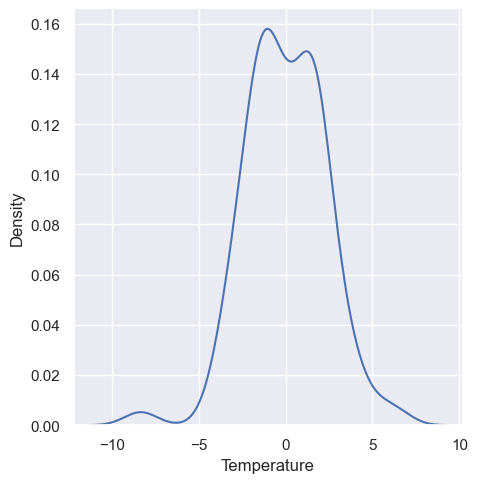

In [119]:
## Distribution of residual are approximately Normal Distribution
sns.displot(residuals,kind="kde")

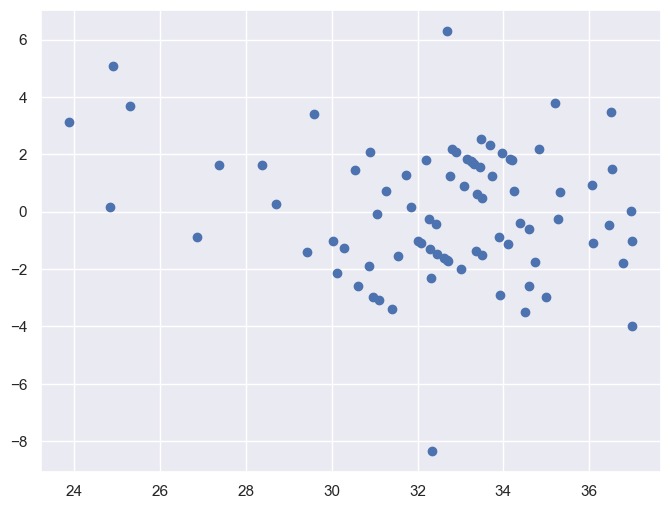

In [120]:
## Scatter plot with prediction and residual
# ##uniform distribution
plt.scatter(ridge_pred,residuals)

In [121]:
## Performance metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

5.166866801524507
1.8238419687139977
2.2730743062039362


In [122]:
## R squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.5189468839959943


In [123]:
## Adjusted R square
## display adjusted R-squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.465496537773327

In [124]:
##lasso Regression
from sklearn.linear_model import Lasso

In [125]:
lasso=Lasso()

In [126]:
lasso

Lasso()

In [127]:
lasso.fit(X_train,Y_train)

Lasso()

In [128]:
##print the coefficients
print(lasso.coef_)

[-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.        ]


In [129]:
##print the intercept
print(lasso.intercept_)

31.98159509202454


In [130]:
X_test1=pd.DataFrame(X_test).fillna(0)

In [131]:
# ## prediction for the test data
lasso_pred=lasso.predict(X_test1)

In [132]:
lasso_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

Text(0, 0.5, 'Test Predicted Data')

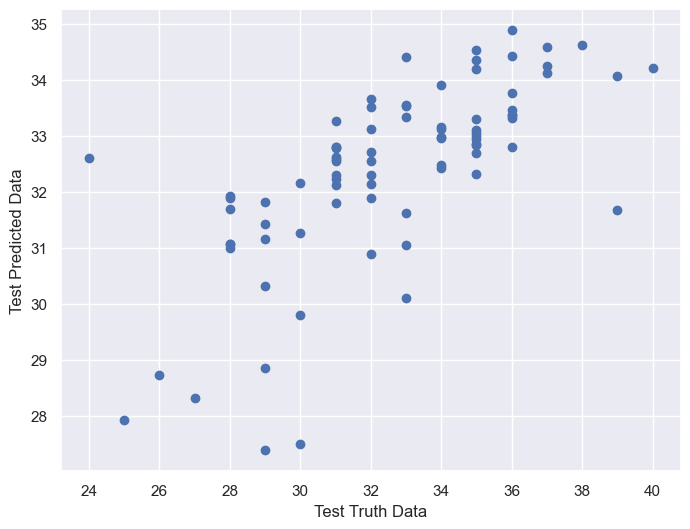

In [133]:
## Relationship between real data & predicted data
plt.scatter(Y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [134]:
## calculating residuals
residuals=Y_test-lasso_pred

In [135]:
residuals

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
         ...   
180    0.884428
5     -1.305114
56     2.230039
125   -2.157622
148    2.629312
Name: Temperature, Length: 81, dtype: float64

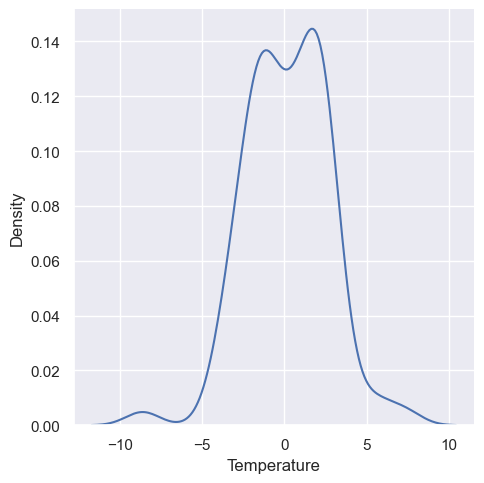

In [136]:
## Distribution of residuals are approximately normal distribution
sns.displot(residuals,kind="kde")

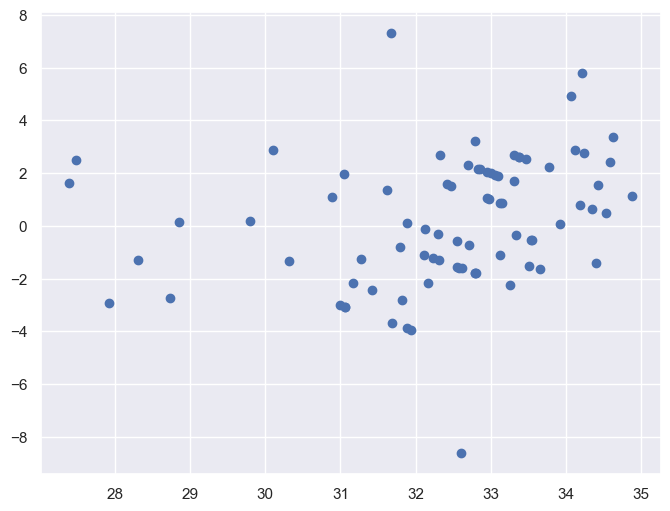

In [137]:
## Scatter plot with prediction and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

In [138]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test,lasso_pred))
print(mean_absolute_error(Y_test,lasso_pred))
print(np.sqrt(mean_squared_error(Y_test,lasso_pred)))

6.085458745527471
1.9978776414662658
2.4668722596696147


In [139]:
## R squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,lasso_pred)
print(score)

0.4334228064508907


In [296]:
## Adjusted R square
## display adjusted R-squared
print(1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.44055113659207235


In [141]:
from sklearn.linear_model import ElasticNet

In [142]:
elastic=ElasticNet()

In [143]:
elastic

ElasticNet()

In [144]:
elastic.fit(X_train,Y_train)

ElasticNet()

In [145]:
print(elastic.coef_)

[-0.70146045 -0.09868324 -0.00938356  0.85954701  0.13673505  0.27669263
  0.0584842   0.09336198]


In [146]:
print(elastic.intercept_)

31.98159509202454


In [147]:
X_test1=pd.DataFrame(X_test).fillna(0)

In [148]:
elastic_pred=elastic.predict(X_test1)

In [149]:
elastic_pred

array([32.70242567, 33.31101947, 33.44376688, 32.68922196, 34.66029486,
       31.61340395, 34.21891986, 28.9987885 , 30.752409  , 30.09138053,
       30.44455594, 32.28514683, 32.51339005, 32.15159258, 33.74900272,
       32.28106799, 35.46194311, 27.84552084, 32.13484344, 32.98789745,
       31.03355133, 29.64646701, 33.72048299, 30.1058646 , 35.27961342,
       28.85882302, 32.42097701, 32.8573114 , 32.77418762, 34.14299732,
       33.35161847, 31.20464562, 32.7164606 , 33.01436975, 32.13810511,
       32.43703959, 30.84650907, 33.35371173, 31.03498886, 27.97873102,
       32.84813048, 32.87794382, 32.23021086, 27.79703997, 34.66761513,
       32.41194503, 31.71392525, 30.75588479, 34.33376897, 33.61014358,
       35.45922981, 31.43259344, 31.58757743, 33.50277522, 33.56581561,
       32.30040204, 35.89302165, 32.04419612, 30.85303736, 34.86616792,
       33.08379086, 30.81430734, 33.46795997, 31.98427893, 31.74980034,
       27.96004347, 32.9927962 , 31.3721508 , 35.23815785, 34.41

Text(0, 0.5, 'Test Predicted Data')

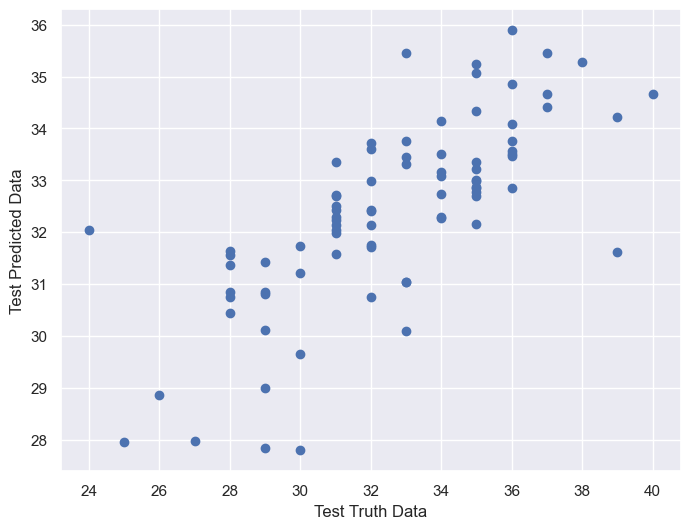

In [150]:
plt.scatter(Y_test,elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [151]:
##Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

5.4080056796099685
1.8523518835293578
2.3255119177527277


In [152]:
## R squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
print(score)

0.4964960229328651


In [153]:
## Adjusted R square
## display adjusted R-squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.44055113659207235